In [1]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file
class_data = pd.read_csv('class_data.csv')

# Display the first 5 rows of the DataFrame
class_data.head()

,booking_id,class_name,center_id,state,start_date_time,stop_date_time,class_capacity,participation_status,female,male,unknown,age_16_17,age_18_22,age_23_28,age_29_34,age_35_44,age_over_35,class_key
0,14book125233,Bodytone,14,ACTIVE,2022-09-07T17:30:00.000Z,2022-09-07T18:00:00.000Z,27,NO SHOW,2,0,0,0,0,0,0,2,2,0
1,14book125233,Bodytone,14,ACTIVE,2022-09-07T17:30:00.000Z,2022-09-07T18:00:00.000Z,27,CANCELLED,10,0,0,0,1,0,1,4,8,1
2,14book125233,Bodytone,14,ACTIVE,2022-09-07T17:30:00.000Z,2022-09-07T18:00:00.000Z,27,ATTENDED,13,1,0,0,1,4,3,1,6,2
3,14book125234,Bodytone,14,ACTIVE,2022-09-14T17:30:00.000Z,2022-09-14T18:00:00.000Z,27,NO SHOW,2,0,0,0,0,0,2,0,0,3
4,14book125234,Bodytone,14,ACTIVE,2022-09-14T17:30:00.000Z,2022-09-14T18:00:00.000Z,27,CANCELLED,9,0,0,0,2,1,0,4,6,4


In [3]:
# Display information about the DataFrame
class_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60128 entries, 0 to 60127
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   booking_id            60128 non-null  object
 1   class_name            60128 non-null  object
 2   center_id             60128 non-null  int64 
 3   state                 60128 non-null  object
 4   start_date_time       60128 non-null  object
 5   stop_date_time        60128 non-null  object
 6   class_capacity        60128 non-null  int64 
 7   participation_status  60128 non-null  object
 8   female                60128 non-null  int64 
 9   male                  60128 non-null  int64 
 10  unknown               60128 non-null  int64 
 11  age_16_17             60128 non-null  int64 
 12  age_18_22             60128 non-null  int64 
 13  age_23_28             60128 non-null  int64 
 14  age_29_34             60128 non-null  int64 
 15  age_35_44             60128 non-null

In [4]:
# Show descriptive statistics
class_data.describe()

,center_id,class_capacity,female,male,unknown,age_16_17,age_18_22,age_23_28,age_29_34,age_35_44,age_over_35,class_key
count,60128.000000,60128.000000,60128.000000,60128.000000,60128.000000,60128.000000,60128.000000,60128.000000,60128.000000,60128.000000,60128.000000,6.012800e+04
mean,140.038052,20.703000,4.047748,0.821847,0.030751,0.027325,0.308375,1.108186,1.071497,1.143344,2.384962,1.326778e+10
std,111.072795,7.945762,4.073227,1.338706,0.177863,0.187512,0.739647,1.593741,1.437678,1.518117,2.907893,9.747779e+09
min,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,28.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.589935e+09
50%,168.000000,23.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.717987e+10
75%,264.000000,28.000000,6.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.576981e+10
max,314.000000,37.000000,46.000000,14.000000,3.000000,3.000000,14.000000,19.000000,16.000000,15.000000,24.000000,2.576982e+10


In [5]:
# Check for missing values
missing_values = class_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 booking_id              0
class_name              0
center_id               0
state                   0
start_date_time         0
stop_date_time          0
class_capacity          0
participation_status    0
female                  0
male                    0
unknown                 0
age_16_17               0
age_18_22               0
age_23_28               0
age_29_34               0
age_35_44               0
age_over_35             0
class_key               0
dtype: int64


In [6]:
# Check column names before dropping
print(class_data.columns.tolist())  # View list of columns

['booking_id', 'class_name', 'center_id', 'state', 'start_date_time', 'stop_date_time', 'class_capacity', 'participation_status', 'female', 'male', 'unknown', 'age_16_17', 'age_18_22', 'age_23_28', 'age_29_34', 'age_35_44', 'age_over_35', 'class_key']


In [7]:
# Remove redundant columns
cleaned_class_data = class_data.drop(columns=['unknown','start_date_time','stop_date_time'])

In [8]:
# View list of columns
print(cleaned_class_data.columns.tolist()) 

['booking_id', 'class_name', 'center_id', 'state', 'class_capacity', 'participation_status', 'female', 'male', 'age_16_17', 'age_18_22', 'age_23_28', 'age_29_34', 'age_35_44', 'age_over_35', 'class_key']


In [9]:
# Display the first few rows of the cleaned DataFrame to verify
print(cleaned_class_data.head())

     booking_id class_name  center_id   state  class_capacity  \
0  14book125233   Bodytone         14  ACTIVE              27   
1  14book125233   Bodytone         14  ACTIVE              27   
2  14book125233   Bodytone         14  ACTIVE              27   
3  14book125234   Bodytone         14  ACTIVE              27   
4  14book125234   Bodytone         14  ACTIVE              27   

  participation_status  female  male  age_16_17  age_18_22  age_23_28  \
0              NO SHOW       2     0          0          0          0   
1            CANCELLED      10     0          0          1          0   
2             ATTENDED      13     1          0          1          4   
3              NO SHOW       2     0          0          0          0   
4            CANCELLED       9     0          0          2          1   

   age_29_34  age_35_44  age_over_35  class_key  
0          0          2            2          0  
1          1          4            8          1  
2          3        

In [10]:
# Display information about the cleaned DataFrame
cleaned_class_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60128 entries, 0 to 60127
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   booking_id            60128 non-null  object
 1   class_name            60128 non-null  object
 2   center_id             60128 non-null  int64 
 3   state                 60128 non-null  object
 4   class_capacity        60128 non-null  int64 
 5   participation_status  60128 non-null  object
 6   female                60128 non-null  int64 
 7   male                  60128 non-null  int64 
 8   age_16_17             60128 non-null  int64 
 9   age_18_22             60128 non-null  int64 
 10  age_23_28             60128 non-null  int64 
 11  age_29_34             60128 non-null  int64 
 12  age_35_44             60128 non-null  int64 
 13  age_over_35           60128 non-null  int64 
 14  class_key             60128 non-null  int64 
dtypes: int64(11), object(4)
memory usage

In [11]:
# Check for duplicates
duplicate_rows = class_data.duplicated()
num_duplicates_class_data = duplicate_rows.sum()
num_duplicates_class_data

0

In [12]:
# Remove rows where participation_status is 'BOOKED' or 'WAITING LIST'
cleaned_class_data = cleaned_class_data[~cleaned_class_data['participation_status'].isin(['BOOKED', 'WAITING LIST'])]

In [13]:
# Standardize class names by stripping whitespace, converting to lowercase, and removing duplicates
cleaned_class_data['class_name'] = cleaned_class_data['class_name'].str.lower().str.strip()

In [14]:
cleaned_class_data.head()

,booking_id,class_name,center_id,state,class_capacity,participation_status,female,male,age_16_17,age_18_22,age_23_28,age_29_34,age_35_44,age_over_35,class_key
0,14book125233,bodytone,14,ACTIVE,27,NO SHOW,2,0,0,0,0,0,2,2,0
1,14book125233,bodytone,14,ACTIVE,27,CANCELLED,10,0,0,1,0,1,4,8,1
2,14book125233,bodytone,14,ACTIVE,27,ATTENDED,13,1,0,1,4,3,1,6,2
3,14book125234,bodytone,14,ACTIVE,27,NO SHOW,2,0,0,0,0,2,0,0,3
4,14book125234,bodytone,14,ACTIVE,27,CANCELLED,9,0,0,2,1,0,4,6,4


In [15]:
# Save the cleaned DataFrame to a new CSV file
class_data.to_csv('cleaned_class_data.csv', index=False)

# Confirm that the CSV file is created
import os
if os.path.exists('cleaned_class_data.csv'):
    print("CSV file successfully created.")
else:
    print("Error: CSV file creation failed.")

CSV file successfully created.


In [16]:
# Load the CSV file
gym_data = pd.read_csv('gym_data.csv')

# Display the first 5 rows of the DataFrame
gym_data.head()

,center_id,opening_date,format,floor_area_net_usable_with_changing,country,division,region,studio,spin,functional,offpeak_MF_1,offpeak_MF_2,offpeak_MF_3,offpeak_MF_4,offpeak_SS
0,293,04/02/2020,LBF,12297,England,East,Region 11,Y,Y,N,NaN,NaN,NaN,NaN,NaN
1,34,06/12/2012,LBF,16783,England,West,Region 6,Y,Y,Y,NaN,NaN,NaN,NaN,NaN
2,264,02/10/2019,SBF,7332,England,West,Region 9,Y,N,Y,12:00am -4:00pm,9:00pm -12:00am (Midnight),NaN,NaN,All Day
3,174,02/02/2017,LBF,14570,England,North,Region 4,Y,Y,Y,12:00am -3:30pm,8:30pm -12:00am (Midnight),NaN,NaN,All Day
4,28,13/09/2012,LBF,17174,England,North,Region 5,Y,Y,Y,NaN,NaN,NaN,NaN,NaN


In [17]:
# Display information about the DataFrame
gym_data.info()

# Show descriptive statistics
gym_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   center_id                            10 non-null     int64 
 1   opening_date                         10 non-null     object
 2   format                               10 non-null     object
 3   floor_area_net_usable_with_changing  10 non-null     int64 
 4   country                              10 non-null     object
 5   division                             10 non-null     object
 6   region                               10 non-null     object
 7   studio                               10 non-null     object
 8   spin                                 10 non-null     object
 9   functional                           10 non-null     object
 10  offpeak_MF_1                         3 non-null      object
 11  offpeak_MF_2                         3 non-null 

,center_id,floor_area_net_usable_with_changing
count,10.000000,10.000000
mean,153.500000,11626.400000
std,118.654728,4446.941501
min,14.000000,6906.000000
25%,31.000000,7500.000000
50%,171.000000,10644.000000
75%,252.000000,16229.750000
max,314.000000,17174.000000


In [18]:
# Check for missing values
missing_values = gym_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 center_id                              0
opening_date                           0
format                                 0
floor_area_net_usable_with_changing    0
country                                0
division                               0
region                                 0
studio                                 0
spin                                   0
functional                             0
offpeak_MF_1                           7
offpeak_MF_2                           7
offpeak_MF_3                           9
offpeak_MF_4                           9
offpeak_SS                             7
dtype: int64


In [19]:
# Drop the specified columns
cleaned_gym_data = gym_data.drop(columns=['format','offpeak_MF_1','offpeak_MF_2','offpeak_MF_3', 'offpeak_MF_4','offpeak_SS'])

In [20]:
 # View list of columns
print(cleaned_gym_data.columns.tolist()) 

['center_id', 'opening_date', 'floor_area_net_usable_with_changing', 'country', 'division', 'region', 'studio', 'spin', 'functional']


In [21]:
# Display the first few rows of the cleaned DataFrame to verify
print(cleaned_gym_data.head())

   center_id opening_date  floor_area_net_usable_with_changing  country  \
0        293   04/02/2020                                12297  England   
1         34   06/12/2012                                16783  England   
2        264   02/10/2019                                 7332  England   
3        174   02/02/2017                                14570  England   
4         28   13/09/2012                                17174  England   

  division     region studio spin functional  
0     East  Region 11      Y    Y          N  
1     West   Region 6      Y    Y          Y  
2     West   Region 9      Y    N          Y  
3    North   Region 4      Y    Y          Y  
4    North   Region 5      Y    Y          Y  


In [22]:
# Display information about the cleaned DataFrame
cleaned_gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   center_id                            10 non-null     int64 
 1   opening_date                         10 non-null     object
 2   floor_area_net_usable_with_changing  10 non-null     int64 
 3   country                              10 non-null     object
 4   division                             10 non-null     object
 5   region                               10 non-null     object
 6   studio                               10 non-null     object
 7   spin                                 10 non-null     object
 8   functional                           10 non-null     object
dtypes: int64(2), object(7)
memory usage: 852.0+ bytes


In [23]:
# Check for duplicates
duplicate_rows = cleaned_gym_data.duplicated()
num_duplicates_cleaned_gym_data = duplicate_rows.sum()
num_duplicates_cleaned_gym_data

0

In [24]:
cleaned_gym_data.head()

,center_id,opening_date,floor_area_net_usable_with_changing,country,division,region,studio,spin,functional
0,293,04/02/2020,12297,England,East,Region 11,Y,Y,N
1,34,06/12/2012,16783,England,West,Region 6,Y,Y,Y
2,264,02/10/2019,7332,England,West,Region 9,Y,N,Y
3,174,02/02/2017,14570,England,North,Region 4,Y,Y,Y
4,28,13/09/2012,17174,England,North,Region 5,Y,Y,Y


In [25]:
# Save the cleaned DataFrame to a new CSV file
gym_data.to_csv('cleaned_gym_data.csv', index=False)

# Confirm that the CSV file is created
import os
if os.path.exists('cleaned_gym_data.csv'):
    print("CSV file successfully created.")
else:
    print("Error: CSV file creation failed.")

CSV file successfully created.


In [26]:
# Load the CSV file
timetable_data = pd.read_csv('timetable_data.csv')

# Display the first 5 rows of the DataFrame
timetable_data.head()

,center_id,space_type,day_of_week,slot_start_time,slot_end_time,class_name,class_length,timetable_key
0,14,STUDIO,Sunday,08:00:00,13:29:59,Pump,45,0
1,14,STUDIO,Thursday,12:00:00,14:59:59,Yoga,60,1
2,14,STUDIO,Thursday,12:00:00,14:59:59,LBT,45,2
3,14,STUDIO,Thursday,16:30:00,20:29:59,Bodytone,45,3
4,14,STUDIO,Sunday,08:00:00,13:29:59,LBT,30,4


In [27]:
# Display information about the DataFrame
timetable_data.info()

# Show descriptive statistics
timetable_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   center_id        1131 non-null   int64 
 1   space_type       1131 non-null   object
 2   day_of_week      1131 non-null   object
 3   slot_start_time  1131 non-null   object
 4   slot_end_time    1131 non-null   object
 5   class_name       1131 non-null   object
 6   class_length     1131 non-null   int64 
 7   timetable_key    1131 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 70.8+ KB


,center_id,class_length,timetable_key
count,1131.000000,1131.000000,1131.000000
mean,150.127321,42.692308,565.000000
std,112.368679,9.562414,326.635883
min,14.000000,30.000000,0.000000
25%,30.000000,30.000000,282.500000
50%,168.000000,45.000000,565.000000
75%,264.000000,45.000000,847.500000
max,314.000000,60.000000,1130.000000


In [28]:
# Check for missing values
missing_values = timetable_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 center_id          0
space_type         0
day_of_week        0
slot_start_time    0
slot_end_time      0
class_name         0
class_length       0
timetable_key      0
dtype: int64


In [29]:
# Check for duplicates
duplicate_rows = timetable_data.duplicated()
num_duplicates_timetable_data = duplicate_rows.sum()
num_duplicates_timetable_data

0

In [30]:
# Load the CSV file
visit_data = pd.read_csv('visit_data.csv')

# Display the first 5 rows of the DataFrame
visit_data.head()

,visit_key,center_id,check_in_datetime,check_out_datetime,check_in_result,gender,age,product_group
0,c6aebdafc1df3da04006f10717b2047e54971ed8a3109b...,168,2022-12-19T18:10:04.000Z,2022-12-19T19:46:03.000Z,ACCESS_GRANTED,MALE,40,MULTI GYM
1,637357cf7a3295545081fb1bcf3ba615d24690113339ad...,168,2023-03-14T16:18:03.000Z,2023-03-14T18:04:45.000Z,ACCESS_GRANTED,MALE,40,MULTI GYM
2,bc3f8f92d1c4602234f16889a7be41445e5829dd7826b6...,168,2023-08-21T11:33:21.000Z,2023-08-21T13:29:36.000Z,ACCESS_GRANTED,MALE,41,MULTI GYM
3,9aad68bf43137ca99ebf646bf83f6093760571d4acb966...,168,2023-07-01T13:02:47.000Z,2023-07-01T14:47:08.000Z,ACCESS_GRANTED,MALE,41,MULTI GYM
4,8761fa65f4c19a78879131bf937eb310110cc03fc6159a...,264,2023-06-25T14:08:13.000Z,2023-06-25T14:49:40.000Z,ACCESS_GRANTED,MALE,30,CORE


In [31]:
# Display information about the DataFrame
visit_data.info()

# Show descriptive statistics
visit_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683282 entries, 0 to 683281
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   visit_key           683282 non-null  object
 1   center_id           683282 non-null  int64 
 2   check_in_datetime   683282 non-null  object
 3   check_out_datetime  683203 non-null  object
 4   check_in_result     683282 non-null  object
 5   gender              683282 non-null  object
 6   age                 683282 non-null  int64 
 7   product_group       683282 non-null  object
dtypes: int64(2), object(6)
memory usage: 41.7+ MB


,center_id,age
count,683282.000000,683282.000000
mean,191.610741,31.425871
std,38.493004,10.868555
min,168.000000,16.000000
25%,168.000000,23.000000
50%,174.000000,29.000000
75%,174.000000,37.000000
max,264.000000,123.000000


In [32]:
# Check for missing values
missing_values = visit_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 visit_key              0
center_id              0
check_in_datetime      0
check_out_datetime    79
check_in_result        0
gender                 0
age                    0
product_group          0
dtype: int64


In [33]:
# Drop the specified columns
cleaned_visit_data = visit_data.drop(columns=['visit_key','check_out_datetime','check_in_result'])

In [34]:
# Display the first few rows of the cleaned DataFrame to verify
print(cleaned_visit_data.head())

   center_id         check_in_datetime gender  age product_group
0        168  2022-12-19T18:10:04.000Z   MALE   40     MULTI GYM
1        168  2023-03-14T16:18:03.000Z   MALE   40     MULTI GYM
2        168  2023-08-21T11:33:21.000Z   MALE   41     MULTI GYM
3        168  2023-07-01T13:02:47.000Z   MALE   41     MULTI GYM
4        264  2023-06-25T14:08:13.000Z   MALE   30          CORE


In [35]:
# Display information about the cleaned DataFrame
cleaned_visit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683282 entries, 0 to 683281
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   center_id          683282 non-null  int64 
 1   check_in_datetime  683282 non-null  object
 2   gender             683282 non-null  object
 3   age                683282 non-null  int64 
 4   product_group      683282 non-null  object
dtypes: int64(2), object(3)
memory usage: 26.1+ MB


In [36]:
# Check for duplicates
duplicate_rows = cleaned_visit_data.duplicated()
num_duplicates_cleaned_visit_data = duplicate_rows.sum()
num_duplicates_cleaned_visit_data

731

In [37]:
# Remove duplicates
cleaned_visit_data.drop_duplicates(inplace=True)

In [38]:
# Convert the check_in_datetime to a datetime object
cleaned_visit_data['check_in_datetime'] = pd.to_datetime(cleaned_visit_data['check_in_datetime'])

# Optionally, format the datetime to a more readable string format
# For example, 'YYYY-MM-DD HH:MM:SS'
cleaned_visit_data['check_in_datetime'] = cleaned_visit_data['check_in_datetime'].dt.strftime('%d-%m-%Y %H:%M:%S')

print(cleaned_visit_data['check_in_datetime'])

0         19-12-2022 18:10:04
1         14-03-2023 16:18:03
2         21-08-2023 11:33:21
3         01-07-2023 13:02:47
4         25-06-2023 14:08:13
                 ...         
683277    18-08-2023 20:30:18
683278    23-08-2023 20:39:31
683279    22-08-2023 20:39:36
683280    20-08-2023 17:05:10
683281    27-08-2023 10:34:20
Name: check_in_datetime, Length: 682551, dtype: object


In [39]:
# Remove rows where gender is 'unknown'
cleaned_visit_data = visit_data[visit_data['gender'].str.lower() != 'unknown']

In [40]:
cleaned_visit_data.head()

,visit_key,center_id,check_in_datetime,check_out_datetime,check_in_result,gender,age,product_group
0,c6aebdafc1df3da04006f10717b2047e54971ed8a3109b...,168,2022-12-19T18:10:04.000Z,2022-12-19T19:46:03.000Z,ACCESS_GRANTED,MALE,40,MULTI GYM
1,637357cf7a3295545081fb1bcf3ba615d24690113339ad...,168,2023-03-14T16:18:03.000Z,2023-03-14T18:04:45.000Z,ACCESS_GRANTED,MALE,40,MULTI GYM
2,bc3f8f92d1c4602234f16889a7be41445e5829dd7826b6...,168,2023-08-21T11:33:21.000Z,2023-08-21T13:29:36.000Z,ACCESS_GRANTED,MALE,41,MULTI GYM
3,9aad68bf43137ca99ebf646bf83f6093760571d4acb966...,168,2023-07-01T13:02:47.000Z,2023-07-01T14:47:08.000Z,ACCESS_GRANTED,MALE,41,MULTI GYM
4,8761fa65f4c19a78879131bf937eb310110cc03fc6159a...,264,2023-06-25T14:08:13.000Z,2023-06-25T14:49:40.000Z,ACCESS_GRANTED,MALE,30,CORE


In [41]:
# Save the cleaned DataFrame to a new CSV file
visit_data.to_csv('cleaned_visit_data.csv', index=False)

# Confirm that the CSV file is created
import os
if os.path.exists('cleaned_visit_data.csv'):
    print("CSV file successfully created.")
else:
    print("Error: CSV file creation failed.")

CSV file successfully created.


In [42]:
# Load the cleaned data
cleaned_class_data = pd.read_csv('cleaned_class_data.csv')
cleaned_gym_data = pd.read_csv('cleaned_gym_data.csv')
cleaned_visit_data = pd.read_csv('cleaned_visit_data.csv')

# Class Participation Status Analysis

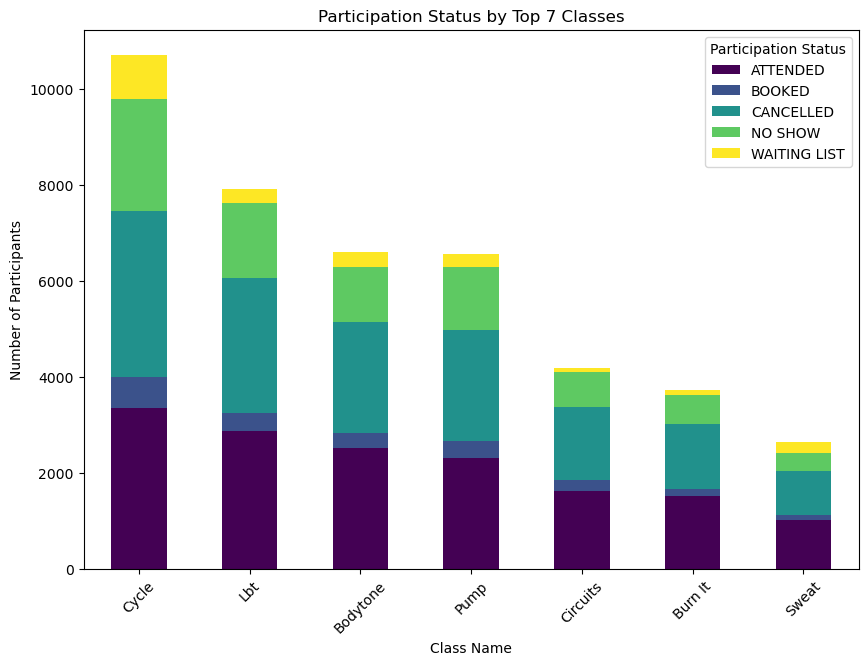

In [43]:
# Standardize class names
cleaned_class_data['class_name'] = cleaned_class_data['class_name'].str.strip().str.title()

# Group by class_name and participation_status, then count the occurrences
class_participation_summary = cleaned_class_data.groupby(['class_name', 'participation_status']).size().unstack(fill_value=0)

# Aggregate participation status by class_name
participation_agg = class_participation_summary

# Find the top 7 classes based on total participation
top_classes = participation_agg.sum(axis=1).sort_values(ascending=False).head(7).index

# Filter data to include only the top 7 classes
participation_agg_top = participation_agg.loc[top_classes]

# Plot stacked bar chart for participation status in top 5 classes
participation_agg_top.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
plt.title('Participation Status by Top 7 Classes')
plt.xlabel('Class Name')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.legend(title='Participation Status')
plt.show()

In [44]:
# Aggregate participation status by class_name
participation_agg = class_participation_summary

# Find the top 7 classes based on total participation
top_classes = participation_agg.sum(axis=1).sort_values(ascending=False).head(7).index

# Filter data to include only the top 7 classes
participation_agg_top = participation_agg.loc[top_classes]

# Print the top 7 class participation summary
print("\nTop 7 Classes Participation Summary:")
print(participation_agg_top)


Top 7 Classes Participation Summary:
participation_status  ATTENDED  BOOKED  CANCELLED  NO SHOW  WAITING LIST
class_name                                                              
Cycle                     3353     656       3461     2336           900
Lbt                       2884     361       2820     1559           287
Bodytone                  2528     306       2303     1158           312
Pump                      2320     354       2314     1296           274
Circuits                  1633     226       1509      743            70
Burn It                   1510     147       1368      602           109
Sweat                     1019      98        917      385           216



Top 7 Classes by Waiting List and Their Proportion:
class_name
Cycle       40.705563
Bodytone    14.111262
Lbt         12.980552
Pump        12.392583
Sweat        9.769335
Strength     5.110810
Burn It      4.929896
Name: WAITING LIST, dtype: float64


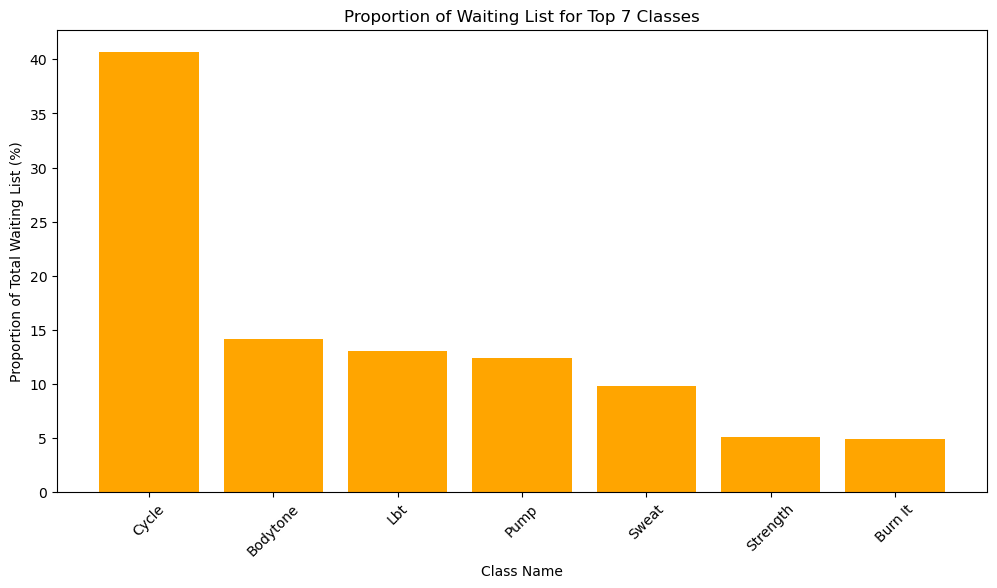

In [45]:
# Find the top 5 classes by the number of people on the waiting list
top_5_waiting_list = class_participation_summary['WAITING LIST'].nlargest(7)

# Calculate the total number of people on the waiting list for these top 5 classes
total_waiting_list = top_5_waiting_list.sum()

# Calculate the proportion of each class's waiting list
waiting_list_proportion = (top_5_waiting_list / total_waiting_list) * 100

# Print the top 5 classes and their waiting list proportions
print("\nTop 7 Classes by Waiting List and Their Proportion:")
print(waiting_list_proportion)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(waiting_list_proportion.index, waiting_list_proportion.values, color='orange')
plt.title('Proportion of Waiting List for Top 7 Classes')
plt.xlabel('Class Name')
plt.ylabel('Proportion of Total Waiting List (%)')
plt.xticks(rotation=45)
plt.show()

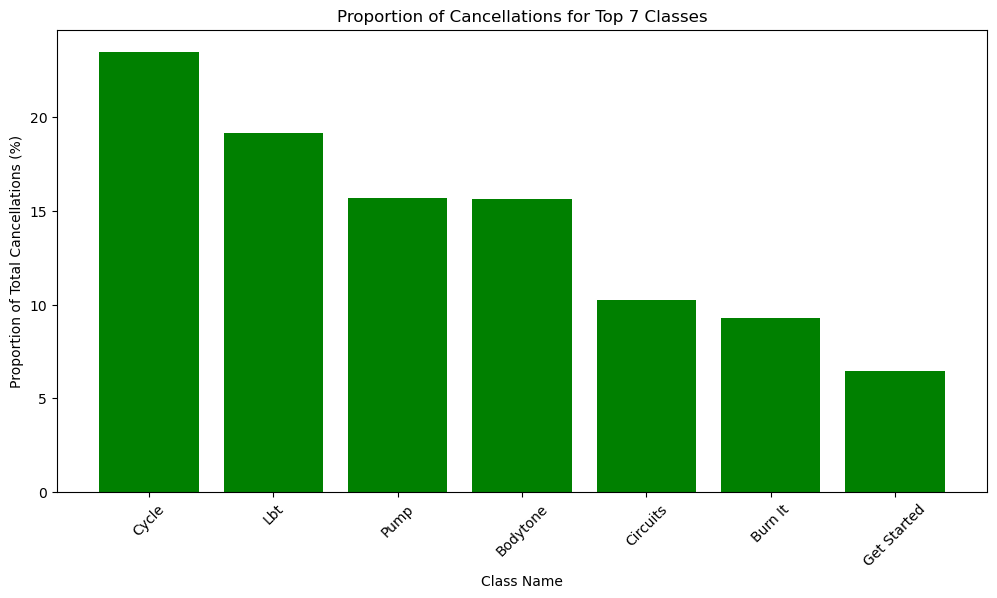

In [46]:
# Top 7 classes by cancellations
top_7_cancellations = class_participation_summary['CANCELLED'].nlargest(7)

# Step 2: Calculate the Total Cancellations for these Top 7 Classes
total_cancellations_top_7 = top_7_cancellations.sum()

# Step 3: Calculate the Proportion of Each Class
cancellation_proportions = (top_7_cancellations / total_cancellations_top_7) * 100

# Step 4: Plot the Proportions
plt.figure(figsize=(12, 6))
plt.bar(cancellation_proportions.index, cancellation_proportions.values, color='green')
plt.title('Proportion of Cancellations for Top 7 Classes')
plt.xlabel('Class Name')
plt.ylabel('Proportion of Total Cancellations (%)')
plt.xticks(rotation=45)
plt.show()


Top 7 Classes by No-Shows:
class_name
Cycle       2336
Lbt         1559
Pump        1296
Bodytone    1158
Circuits     743
Burn It      602
Sweat        385
Name: NO SHOW, dtype: int64


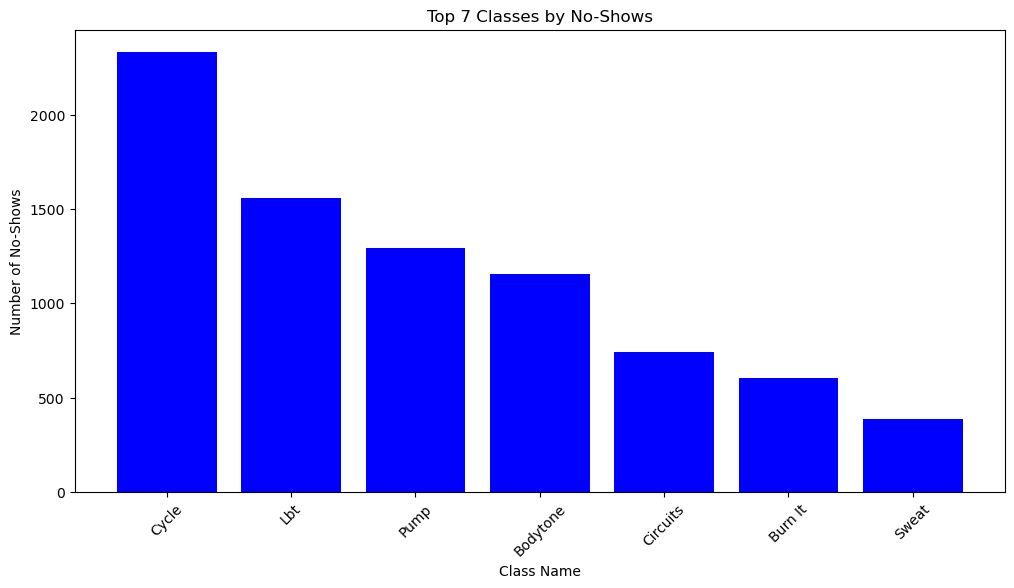

In [47]:
# Top 7 classes by no-shows
top_7_no_shows = class_participation_summary['NO SHOW'].nlargest(7)
print("\nTop 7 Classes by No-Shows:")
print(top_7_no_shows)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_7_no_shows.index, top_7_no_shows.values, color='blue')
plt.title('Top 7 Classes by No-Shows')
plt.xlabel('Class Name')
plt.ylabel('Number of No-Shows')
plt.xticks(rotation=45)
plt.show()


Top 7 Classes by Cancellations:
class_name
Cycle          3461
Lbt            2820
Pump           2314
Bodytone       2303
Circuits       1509
Burn It        1368
Get Started     952
Name: CANCELLED, dtype: int64

Top 7 Classes by No-Shows:
class_name
Cycle       2336
Lbt         1559
Pump        1296
Bodytone    1158
Circuits     743
Burn It      602
Sweat        385
Name: NO SHOW, dtype: int64


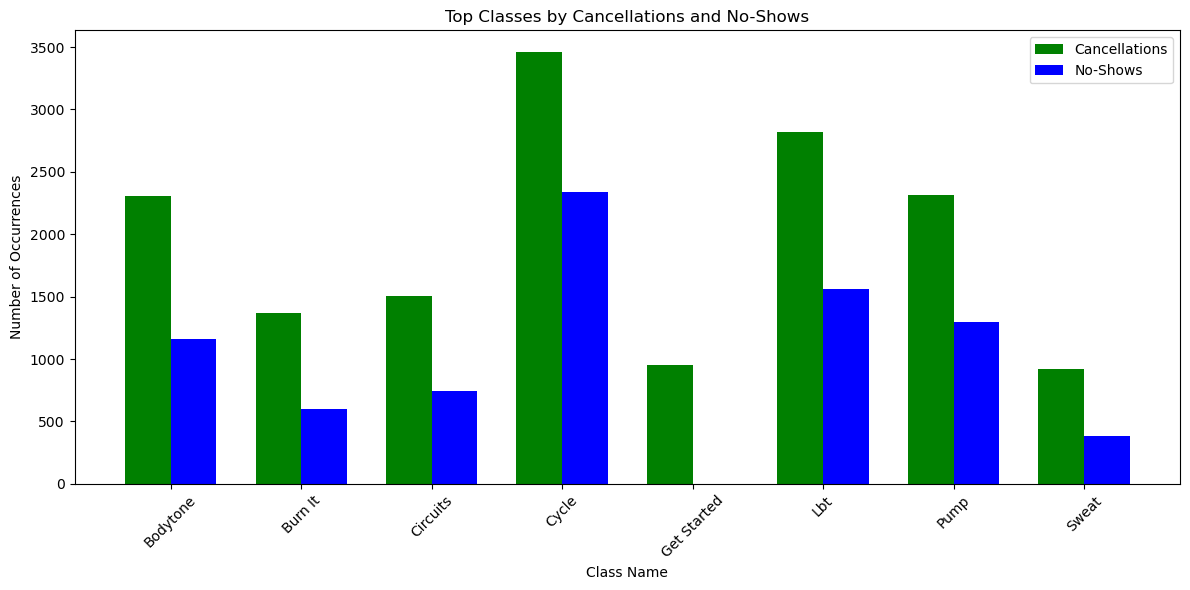

In [48]:
# Top 7 classes by cancellations
top_7_cancellations = class_participation_summary['CANCELLED'].nlargest(7)
print("\nTop 7 Classes by Cancellations:")
print(top_7_cancellations)

# Top 7 classes by no-shows
top_7_no_shows = class_participation_summary['NO SHOW'].nlargest(7)
print("\nTop 7 Classes by No-Shows:")
print(top_7_no_shows)

# Get the union of the top 7 classes by cancellations and no-shows
top_classes = top_7_cancellations.index.union(top_7_no_shows.index)

# Get the values for both cancellations and no-shows for these classes
cancellations = class_participation_summary.loc[top_classes, 'CANCELLED']
no_shows = class_participation_summary.loc[top_classes, 'NO SHOW']

# Plotting
x = np.arange(len(top_classes))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, cancellations, width, label='Cancellations', color='green')
plt.bar(x + width/2, no_shows, width, label='No-Shows', color='blue')

plt.title('Top Classes by Cancellations and No-Shows')
plt.xlabel('Class Name')
plt.ylabel('Number of Occurrences')
plt.xticks(x, top_classes, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Age Group Analysis

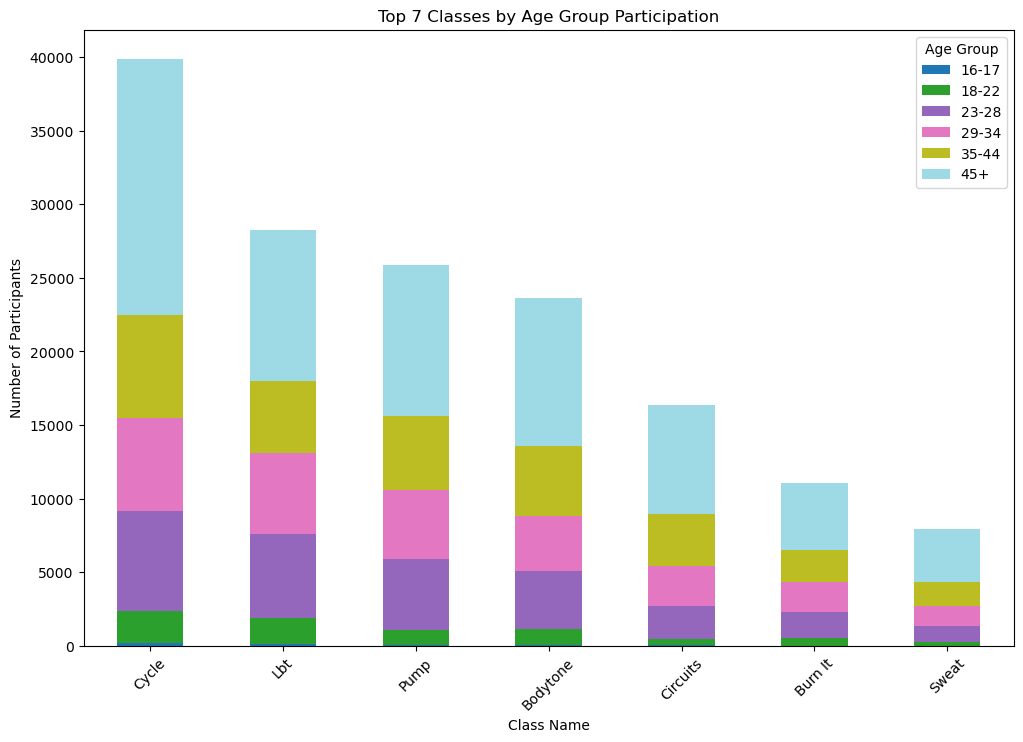

In [49]:
# Standardize class names
cleaned_class_data['class_name'] = cleaned_class_data['class_name'].str.strip().str.title()

# Filter for attended classes only
attended_data = cleaned_class_data[cleaned_class_data['participation_status'] == 'ATTENDED']

# Group by class name and sum the participants for each age group
age_group_popularity = attended_data.groupby('class_name')[['age_16_17', 'age_18_22', 'age_23_28', 'age_29_34', 'age_35_44', 'age_over_35']].sum()

# Rename columns for better readability
age_group_popularity.columns = ['16-17', '18-22', '23-28', '29-34', '35-44', '45+']

# Calculate total number of participants for each class
age_group_popularity['Total'] = age_group_popularity.sum(axis=1)

# Find the top 5 classes based on total number of participants
top_7_classes_overall = age_group_popularity['Total'].sort_values(ascending=False).head(7).index

# Filter data to include only the top 5 classes
top_7_age_group_popularity = age_group_popularity.loc[top_7_classes_overall]

# Plotting the top 5 classes broken down by age group
top_7_age_group_popularity.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Top 7 Classes by Age Group Participation')
plt.xlabel('Class Name')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

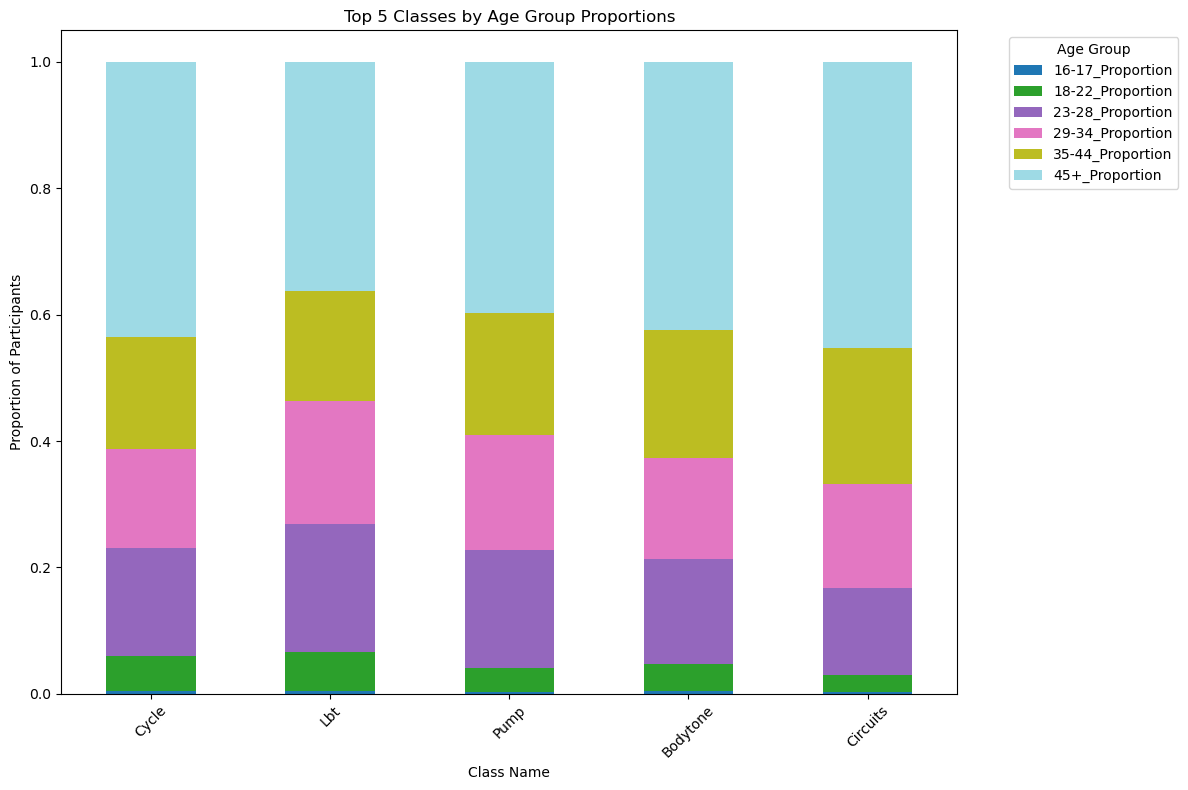

In [50]:
# Standardize class names: strip any leading/trailing spaces and convert to title case
cleaned_class_data['class_name'] = cleaned_class_data['class_name'].str.strip().str.title()

# Filter for attended classes only
attended_data = cleaned_class_data[cleaned_class_data['participation_status'] == 'ATTENDED']

# Group by class name and sum the participants for each age group
age_group_popularity = attended_data.groupby('class_name')[['age_16_17', 'age_18_22', 'age_23_28', 'age_29_34', 'age_35_44', 'age_over_35']].sum()

# Rename columns for better readability
age_group_popularity.columns = ['16-17', '18-22', '23-28', '29-34', '35-44', '45+']

# Calculate total number of participants for each class
age_group_popularity['Total'] = age_group_popularity.sum(axis=1)

# Calculate the proportion of each age group
for column in ['16-17', '18-22', '23-28', '29-34', '35-44', '45+']:
    age_group_popularity[f'{column}_Proportion'] = age_group_popularity[column] / age_group_popularity['Total']

# Find the top 7 classes overall based on total participants
top_5_classes_overall = age_group_popularity['Total'].sort_values(ascending=False).head(5).index

# Filter data to include only the top 7 classes
top_5_age_group_popularity = age_group_popularity.loc[top_5_classes_overall]

# Drop the 'Total' columns used for calculations
top_5_age_group_proportions = top_5_age_group_popularity.filter(like='_Proportion')

# Plotting the top 5 classes broken down by age group in proportions
plt.figure(figsize=(12, 8))
ax = top_5_age_group_proportions.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

# Title and labels
plt.title('Top 5 Classes by Age Group Proportions')
plt.xlabel('Class Name')
plt.ylabel('Proportion of Participants')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Move legend outside of the graph
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

# Show plot
plt.show()

# Gender-Based Class Preferences

In [51]:
# Standardize class names: strip any leading/trailing spaces and convert to title case
cleaned_class_data['class_name'] = cleaned_class_data['class_name'].str.strip().str.title()

# Calculate total attendees for each class
cleaned_class_data['total_attendees'] = cleaned_class_data['male'] + cleaned_class_data['female']

# Calculate the proportion of male and female attendees
cleaned_class_data['male_proportion'] = cleaned_class_data['male'] / cleaned_class_data['total_attendees']
cleaned_class_data['female_proportion'] = cleaned_class_data['female'] / cleaned_class_data['total_attendees']

# Aggregate data by class_name
class_gender_summary = cleaned_class_data.groupby('class_name').agg({
    'male': 'sum',
    'female': 'sum',
    'total_attendees': 'sum',
    'male_proportion': 'mean',
    'female_proportion': 'mean'
}).reset_index()

# Display the results
print("Class Gender Preferences:")
print(class_gender_summary)

Class Gender Preferences:
                       class_name   male  female  total_attendees  \
0                    Absolute Abs   1228    6828             8056   
1                        Aerobics     14     511              525   
2                        Bodytone   3503   30169            33672   
3                        Bootcamp   1518    5681             7199   
4                         Box Fit     42     184              226   
5                         Burn It   2804   12710            15514   
6                   Charity Class     23      59               82   
7                        Circuits   5715   14997            20712   
8                          Combat     95     869              964   
9             Complimentary 1-2-1     36     119              155   
10                          Cycle  16508   54473            70981   
11                          Dance     37    1172             1209   
12                     Functional     42     120              162   
13      

In [52]:
# Calculate total male and female attendees per class
cleaned_class_data['total_male_attendees'] = cleaned_class_data['male']
cleaned_class_data['total_female_attendees'] = cleaned_class_data['female']

# Group by class_name and sum up the male and female attendees
class_attendance = cleaned_class_data.groupby('class_name').agg({
    'total_male_attendees': 'sum',
    'total_female_attendees': 'sum'
}).reset_index()

# Find the top 5 classes by male attendees
top_5_male_attendance = class_attendance.sort_values(by='total_male_attendees', ascending=False).head(5)

# Find the top 5 classes by female attendees
top_5_female_attendance = class_attendance.sort_values(by='total_female_attendees', ascending=False).head(5)

print("Top 5 Classes by Male Attendees:")
print(top_5_male_attendance)

print("\nTop 5 Classes by Female Attendees:")
print(top_5_female_attendance)

Top 5 Classes by Male Attendees:
   class_name  total_male_attendees  total_female_attendees
10      Cycle                 16508                   54473
7    Circuits                  5715                   14997
26       Pump                  5357                   31270
2    Bodytone                  3503                   30169
5     Burn It                  2804                   12710

Top 5 Classes by Female Attendees:
   class_name  total_male_attendees  total_female_attendees
10      Cycle                 16508                   54473
16        Lbt                  2742                   39480
26       Pump                  5357                   31270
2    Bodytone                  3503                   30169
7    Circuits                  5715                   14997


In [53]:
# Standardize class names: strip any leading/trailing spaces and convert to title case
cleaned_class_data['class_name'] = cleaned_class_data['class_name'].str.strip().str.title()

# Calculate total attendees for each class
cleaned_class_data['total_attendees'] = cleaned_class_data['male'] + cleaned_class_data['female']

# Calculate the proportion of male and female attendees
cleaned_class_data['male_proportion'] = cleaned_class_data['male'] / cleaned_class_data['total_attendees']
cleaned_class_data['female_proportion'] = cleaned_class_data['female'] / cleaned_class_data['total_attendees']

# Aggregate data by class_name
class_gender_summary = cleaned_class_data.groupby('class_name').agg({
    'male': 'sum',
    'female': 'sum',
    'total_attendees': 'sum',
    'male_proportion': 'mean',
    'female_proportion': 'mean'
}).reset_index()

# Display the results
print("Class Gender Preferences:")
print(class_gender_summary)

Class Gender Preferences:
                       class_name   male  female  total_attendees  \
0                    Absolute Abs   1228    6828             8056   
1                        Aerobics     14     511              525   
2                        Bodytone   3503   30169            33672   
3                        Bootcamp   1518    5681             7199   
4                         Box Fit     42     184              226   
5                         Burn It   2804   12710            15514   
6                   Charity Class     23      59               82   
7                        Circuits   5715   14997            20712   
8                          Combat     95     869              964   
9             Complimentary 1-2-1     36     119              155   
10                          Cycle  16508   54473            70981   
11                          Dance     37    1172             1209   
12                     Functional     42     120              162   
13      

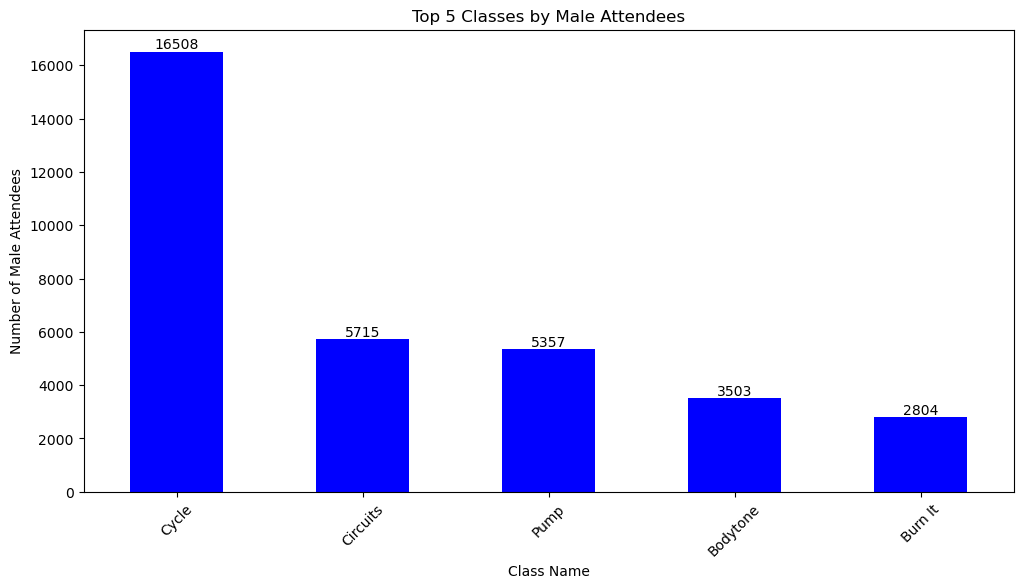

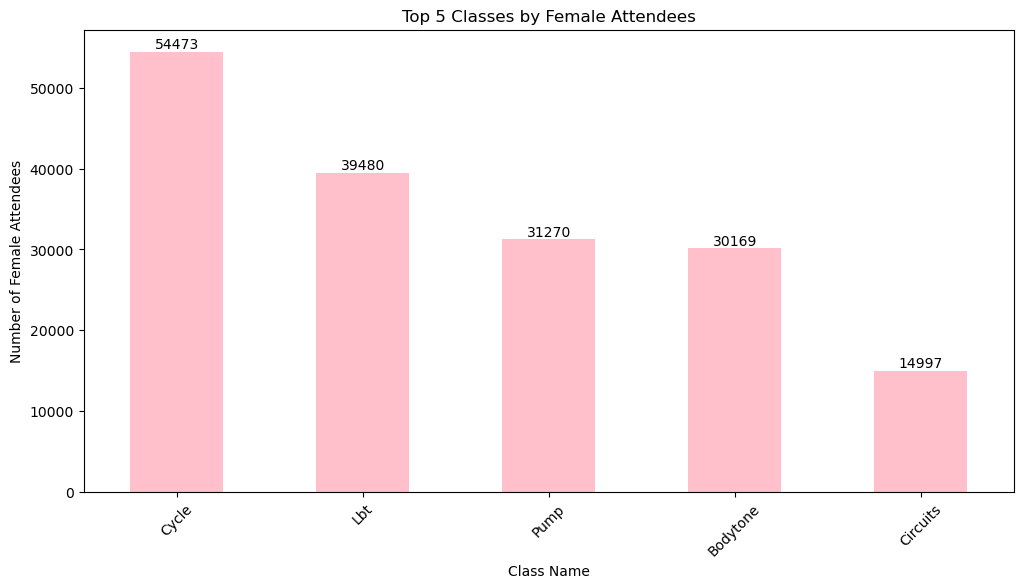

In [54]:
# Plot top 5 male attendees
plt.figure(figsize=(12, 6))

bars = top_5_male_attendance.plot(kind='bar', x='class_name', y='total_male_attendees', color='blue', legend=False, ax=plt.gca())
plt.title('Top 5 Classes by Male Attendees')
plt.xlabel('Class Name')
plt.ylabel('Number of Male Attendees')
plt.xticks(rotation=45)

# Add numerical values on bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

plt.show()

# Plot top 5 female attendees
plt.figure(figsize=(12, 6))

# Plot top 5 female attendees
bars = top_5_female_attendance.plot(kind='bar', x='class_name', y='total_female_attendees', color='pink', legend=False, ax=plt.gca())
plt.title('Top 5 Classes by Female Attendees')
plt.xlabel('Class Name')
plt.ylabel('Number of Female Attendees')
plt.xticks(rotation=45)

# Add numerical values on bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

plt.show()

# Class Capacity Utilisation

In [55]:
# Filter data for 'ATTENDED' status
attended_data = cleaned_class_data[cleaned_class_data['participation_status'] == 'ATTENDED']

# Calculate total participants for each class
attended_data['total_participants'] = attended_data['female'] + attended_data['male']

# Aggregate total attendance and class capacity for each class
aggregated_data = attended_data.groupby('class_name').agg({
    'total_participants': 'sum',
    'class_capacity': 'sum'  # Summing capacity in case of multiple entries
}).reset_index()

# Calculate percentage of class capacity filled
aggregated_data['percentage_filled'] = (aggregated_data['total_participants'] / aggregated_data['class_capacity']) * 100

# Sort by percentage filled in ascending order to find lowest utilization
class_data_sorted = aggregated_data.sort_values(by='percentage_filled').head(10)

# Display the lowest 10 utilized classes
print("Lowest 10 Utilized Classes:")
print(class_data_sorted)

Lowest 10 Utilized Classes:
                       class_name  total_participants  class_capacity  \
29                        Stretch                1157            7431   
24  Move Your Mind Circuits Class                  37             199   
0                    Absolute Abs                4900           25111   
3                        Bootcamp                4655           21130   
33                          Zumba                1905            8308   
25                        Pilates                 618            2629   
5                         Burn It                8814           35668   
20                   Learn To Run                   2               8   
8                          Combat                 523            1955   
11                          Dance                 788            2745   

    percentage_filled  
29          15.569910  
24          18.592965  
0           19.513361  
3           22.030289  
33          22.929706  
25          23.507037  


C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\152668085.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attended_data['total_participants'] = attended_data['female'] + attended_data['male']


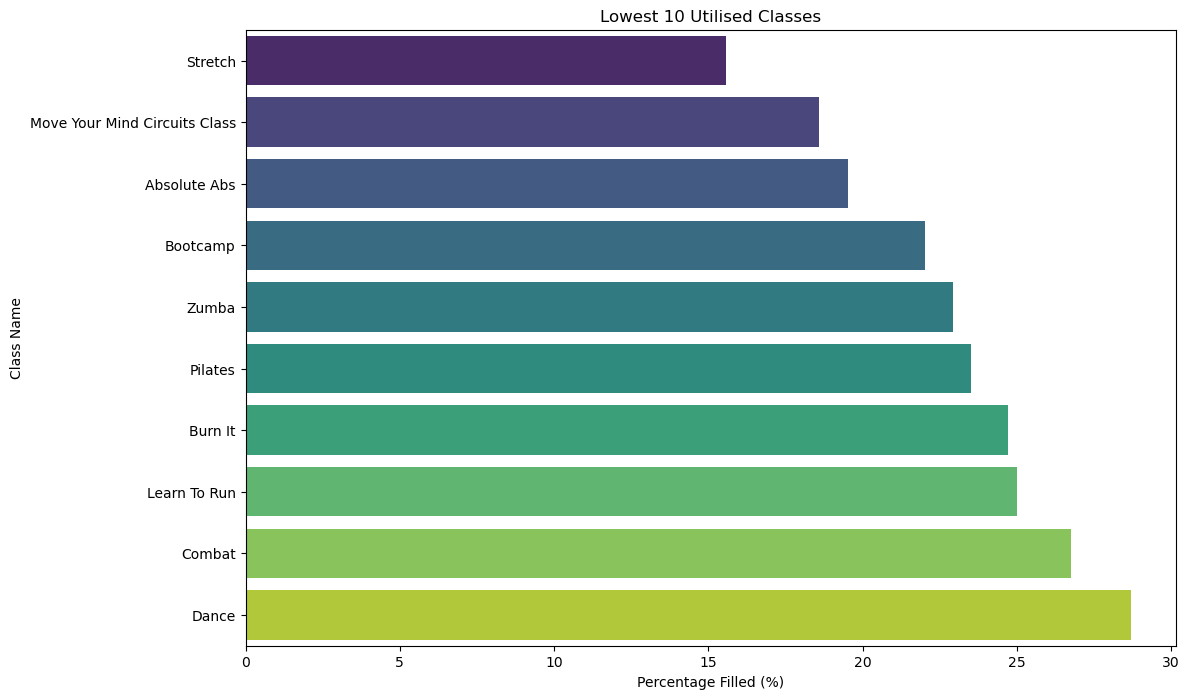

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the lowest 10 utilized classes
plt.figure(figsize=(12, 8))
sns.barplot(x='percentage_filled', y='class_name', data=class_data_sorted, palette='viridis')
plt.title('Lowest 10 Utilised Classes')
plt.xlabel('Percentage Filled (%)')
plt.ylabel('Class Name')
plt.show()

# Day of Week and Attendance

C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\3508092571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attended_data['total_participants'] = attended_data['female'] + attended_data['male']


  day_of_week  percentage_attendance
1      Monday              15.689934
5     Tuesday              19.761925
6   Wednesday              22.576697
4    Thursday              15.610231
0      Friday              18.510484
2    Saturday               3.789274
3      Sunday               4.061453


C:\Users\todyl\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


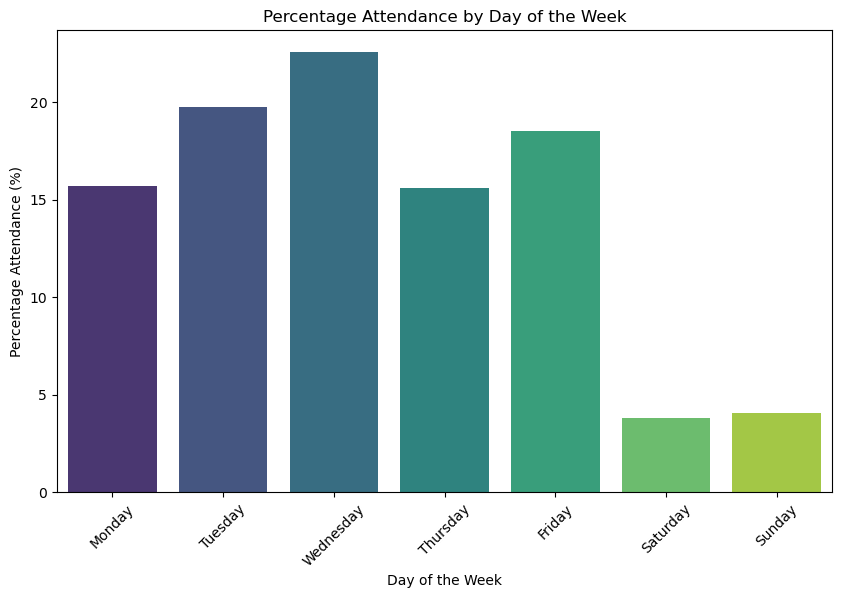

In [57]:
# Filter for 'ATTENDED' status in cleaned_class_data
attended_data = cleaned_class_data[cleaned_class_data['participation_status'] == 'ATTENDED']

# Calculate total participants for each class
attended_data['total_participants'] = attended_data['female'] + attended_data['male']

# Merge the timetable data with the attendance data on 'class_name'
merged_data = pd.merge(timetable_data, attended_data, on='class_name', how='left')

# Calculate total attendance per day of the week
attendance_by_day = merged_data.groupby('day_of_week')['total_participants'].sum().reset_index(name='total_attendance')

# Calculate total attendance across all days
total_attendance = attendance_by_day['total_attendance'].sum()

# Calculate percentage attendance per day
attendance_by_day['percentage_attendance'] = (attendance_by_day['total_attendance'] / total_attendance) * 100

# Ensure days of the week are in the correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
attendance_by_day['day_of_week'] = pd.Categorical(attendance_by_day['day_of_week'], categories=day_order, ordered=True)
attendance_by_day = attendance_by_day.sort_values('day_of_week')

# Display the attendance by day
print(attendance_by_day[['day_of_week', 'percentage_attendance']])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='percentage_attendance', data=attendance_by_day, palette='viridis')
plt.title('Percentage Attendance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage Attendance (%)')
plt.xticks(rotation=45)
plt.show()

In [58]:
cleaned_class_data['class_name'] = cleaned_class_data['class_name'].str.strip().str.title()
timetable_data['class_name'] = timetable_data['class_name'].str.strip().str.title()

print(merged_data.isnull().sum())

merged_data = pd.merge(cleaned_class_data, timetable_data, on='class_name', how='outer')

center_id_x                 0
space_type                  0
day_of_week                 0
slot_start_time             0
slot_end_time               0
class_name                  0
class_length                0
timetable_key               0
booking_id                202
center_id_y               202
state                     202
start_date_time           202
stop_date_time            202
class_capacity            202
participation_status      202
female                    202
male                      202
unknown                   202
age_16_17                 202
age_18_22                 202
age_23_28                 202
age_29_34                 202
age_35_44                 202
age_over_35               202
class_key                 202
total_attendees           202
male_proportion           541
female_proportion         541
total_male_attendees      202
total_female_attendees    202
total_participants        202
dtype: int64


   class_name  total_participants  attendance_proportion
8        Pump              826920               0.266731
4       Cycle              786096               0.253562
1    Bodytone              746480               0.240784
6         Lbt              485835               0.156711
11       Yoga               92196               0.029739
10      Sweat               43484               0.014026
12      Zumba               38100               0.012290
9        Step               29760               0.009599
7     Pilates               18540               0.005980
2     Burn It               17628               0.005686
5       Dance                7880               0.002542
3      Combat                5230               0.001687
0    Aerobics                2058               0.000664


C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\2473218643.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attended_data['total_participants'] = attended_data['female'] + attended_data['male']


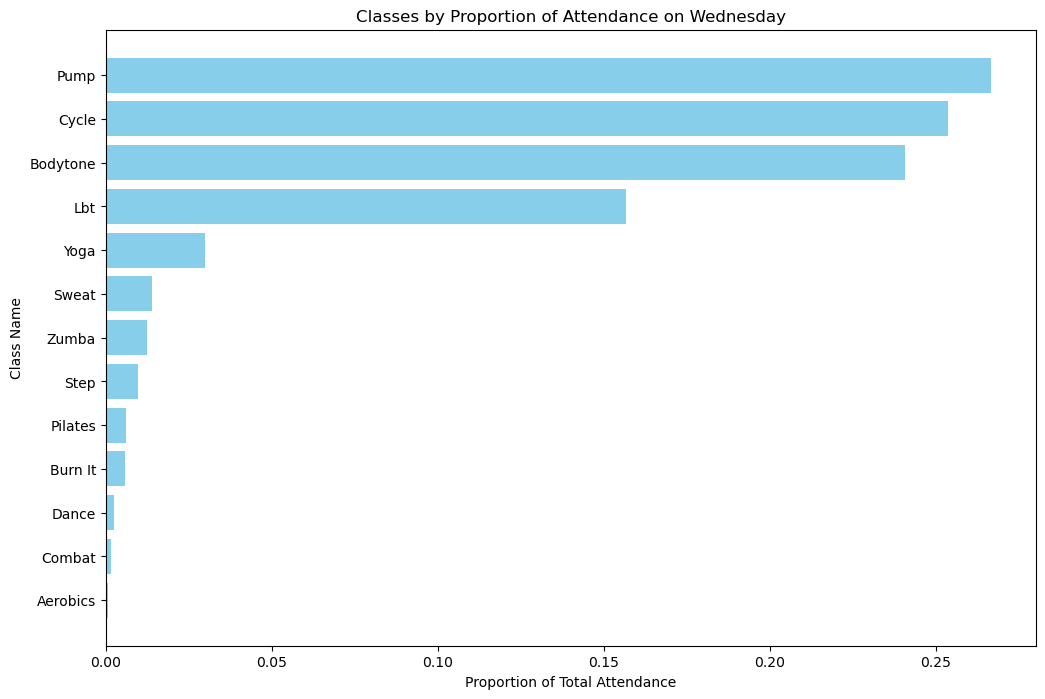

In [59]:
# Assuming 'class_name' is the common key
merged_data = pd.merge(cleaned_class_data, timetable_data, on='class_name', how='left')

# Filter for 'ATTENDED' status
attended_data = merged_data[merged_data['participation_status'] == 'ATTENDED']

# Calculate total participants for each class
attended_data['total_participants'] = attended_data['female'] + attended_data['male']

# Filter the dataset for Wednesday
wednesday_data = attended_data[attended_data['day_of_week'] == 'Wednesday']

# Aggregate the total attendance by class for Wednesday
wednesday_attendance = wednesday_data.groupby('class_name')['total_participants'].sum().reset_index()

# Calculate total attendance across all classes on Wednesday
total_attendance_wednesday = wednesday_attendance['total_participants'].sum()

# Calculate the proportion of attendance for each class
wednesday_attendance['attendance_proportion'] = wednesday_attendance['total_participants'] / total_attendance_wednesday

# Sort the data to find the top 10 classes with the highest attendance proportion
top_7_wednesday_classes = wednesday_attendance.sort_values(by='attendance_proportion', ascending=False).head(13)

# Print top 5 data
print(top_7_wednesday_classes)

# Plot the top 5 classes as proportions
plt.figure(figsize=(12, 8))
plt.barh(top_7_wednesday_classes['class_name'], top_7_wednesday_classes['attendancSe_proportion'], color='skyblue')
plt.xlabel('Proportion of Total Attendance')
plt.ylabel('Class Name')
plt.title('Classes by Proportion of Attendance on Wednesday')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\226277529.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attended_data['total_participants'] = attended_data['female'] + attended_data['male']


  class_name  total_participants  attendance_proportion
0   Aerobics                2058               0.000664
3     Combat                5230               0.001687
5      Dance                7880               0.002542
2    Burn It               17628               0.005686
7    Pilates               18540               0.005980


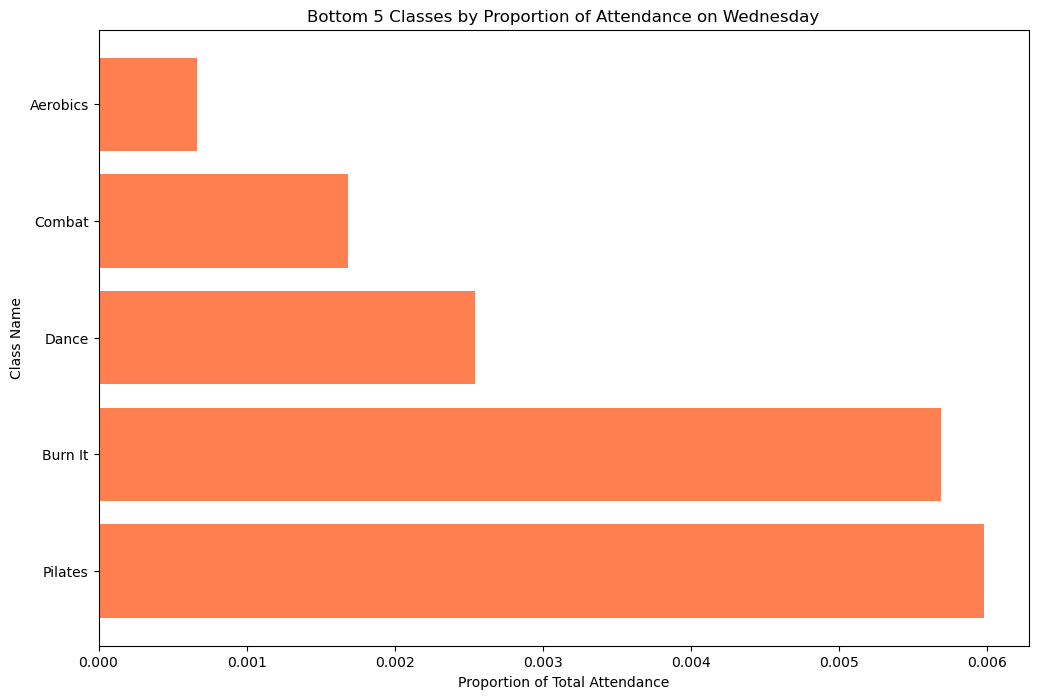

In [60]:
# Assuming 'class_name' is the common key
merged_data = pd.merge(cleaned_class_data, timetable_data, on='class_name', how='left')

# Filter for 'ATTENDED' status
attended_data = merged_data[merged_data['participation_status'] == 'ATTENDED']

# Calculate total participants for each class
attended_data['total_participants'] = attended_data['female'] + attended_data['male']

# Filter the dataset for Wednesday
wednesday_data = attended_data[attended_data['day_of_week'] == 'Wednesday']

# Aggregate the total attendance by class for Wednesday
wednesday_attendance = wednesday_data.groupby('class_name')['total_participants'].sum().reset_index()

# Calculate total attendance across all classes on Wednesday
total_attendance_wednesday = wednesday_attendance['total_participants'].sum()

# Calculate the proportion of attendance for each class
wednesday_attendance['attendance_proportion'] = wednesday_attendance['total_participants'] / total_attendance_wednesday

# Sort the data to find the bottom 10 classes with the lowest attendance proportion
bottom_5_wednesday_classes = wednesday_attendance.sort_values(by='attendance_proportion', ascending=True).head(5)

# Print bottom 5 data
print(bottom_5_wednesday_classes)

# Plot the bottom 5 classes as proportions
plt.figure(figsize=(12, 8))
plt.barh(bottom_5_wednesday_classes['class_name'], bottom_5_wednesday_classes['attendance_proportion'], color='coral')
plt.xlabel('Proportion of Total Attendance')
plt.ylabel('Class Name')
plt.title('Bottom 5 Classes by Proportion of Attendance on Wednesday')
plt.gca().invert_yaxis()  # Invert y-axis to show the lowest at the top
plt.show()

  class_name  total_participants  attendance_proportion
2        Lbt              231350               0.349024
4       Pump              206730               0.311881
0      Cycle              196524               0.296484
5       Yoga               14184               0.021399
1      Dance                7880               0.011888
3    Pilates                6180               0.009323


C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\1640185188.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attended_data['total_participants'] = attended_data['female'] + attended_data['male']


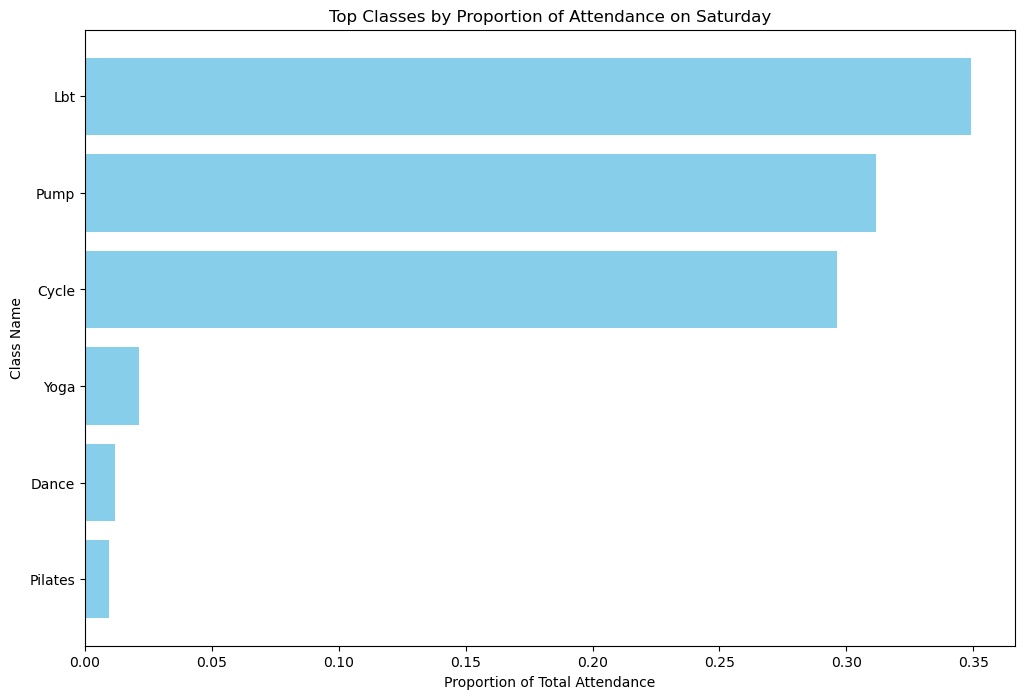

In [61]:
# Assuming 'class_name' is the common key
merged_data = pd.merge(cleaned_class_data, timetable_data, on='class_name', how='left')

# Filter for 'ATTENDED' status
attended_data = merged_data[merged_data['participation_status'] == 'ATTENDED']

# Calculate total participants for each class
attended_data['total_participants'] = attended_data['female'] + attended_data['male']

# Filter the dataset for Saturday
saturday_data = attended_data[attended_data['day_of_week'] == 'Saturday']

# Aggregate the total attendance by class for Saturday
saturday_attendance = saturday_data.groupby('class_name')['total_participants'].sum().reset_index()

# Calculate total attendance across all classes on Saturday
total_attendance_saturday = saturday_attendance['total_participants'].sum()

# Calculate the proportion of attendance for each class
saturday_attendance['attendance_proportion'] = saturday_attendance['total_participants'] / total_attendance_saturday

# Sort the data to find the top 5 classes with the highest attendance proportion
top_saturday_classes = saturday_attendance.sort_values(by='attendance_proportion', ascending=False).head(7)

# Print top  data
print(top_saturday_classes)

# Plot the top classes as proportions
plt.figure(figsize=(12, 8))
plt.barh(top_saturday_classes['class_name'], top_saturday_classes['attendance_proportion'], color='skyblue')
plt.xlabel('Proportion of Total Attendance')
plt.ylabel('Class Name')
plt.title('Top Classes by Proportion of Attendance on Saturday')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

  class_name  total_participants  attendance_proportion
2        Lbt              231350               0.333433
3       Pump              206730               0.297950
0      Cycle              196524               0.283240
4       Yoga               35460               0.051107
5      Zumba               19050               0.027456
1      Dance                4728               0.006814


C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\1936678267.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attended_data['total_participants'] = attended_data['female'] + attended_data['male']


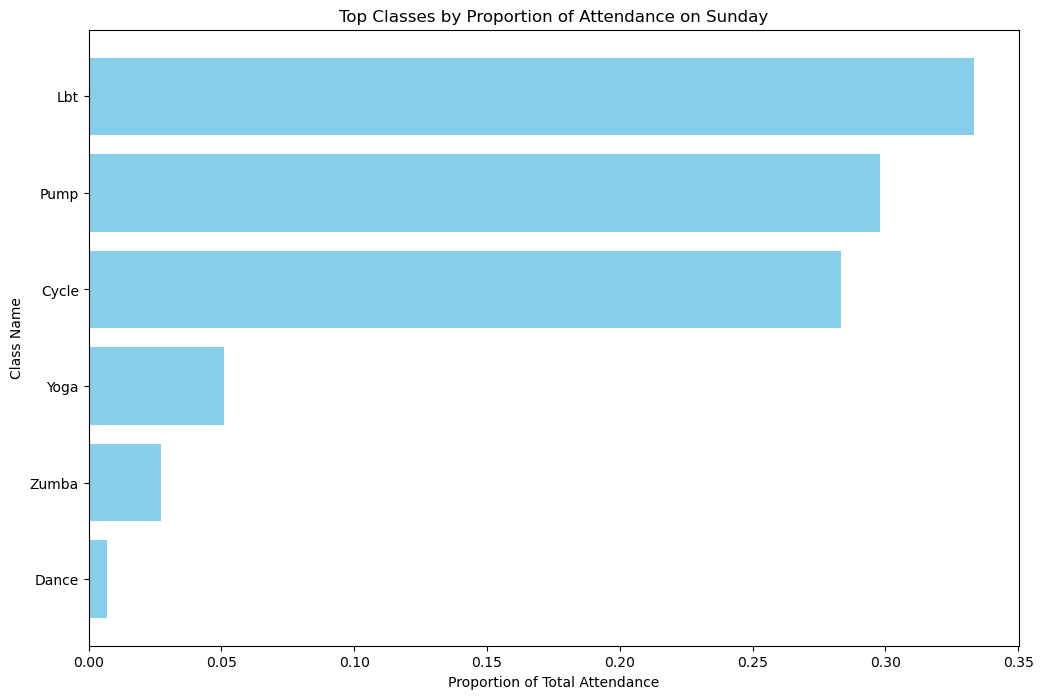

In [62]:
# Assuming 'class_name' is the common key
merged_data = pd.merge(cleaned_class_data, timetable_data, on='class_name', how='left')

# Filter for 'ATTENDED' status
attended_data = merged_data[merged_data['participation_status'] == 'ATTENDED']

# Calculate total participants for each class
attended_data['total_participants'] = attended_data['female'] + attended_data['male']

# Filter the dataset for Sunday
sunday_data = attended_data[attended_data['day_of_week'] == 'Sunday']

# Aggregate the total attendance by class for Sunday
sunday_attendance = sunday_data.groupby('class_name')['total_participants'].sum().reset_index()

# Calculate total attendance across all classes on Sunday
total_attendance_sunday = sunday_attendance['total_participants'].sum()

# Calculate the proportion of attendance for each class
sunday_attendance['attendance_proportion'] = sunday_attendance['total_participants'] / total_attendance_sunday

# Sort the data to find the top 10 classes with the highest attendance proportion
top_sunday_classes = sunday_attendance.sort_values(by='attendance_proportion', ascending=False).head(10)

# Print top data
print(top_sunday_classes)

# Plot the top classes as proportions
plt.figure(figsize=(12, 8))
plt.barh(top_sunday_classes['class_name'], top_sunday_classes['attendance_proportion'], color='skyblue')
plt.xlabel('Proportion of Total Attendance')
plt.ylabel('Class Name')
plt.title('Top Classes by Proportion of Attendance on Sunday')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\2109993996.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wednesday_classes['slot_start_time'] = pd.to_datetime(wednesday_classes['slot_start_time'])
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\2109993996.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wednesday_classes['slot_start_time'] = pd.to_datetime(wednesday_classes['slot_start_time'])
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\2109993996.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

<Figure size 1400x700 with 0 Axes>

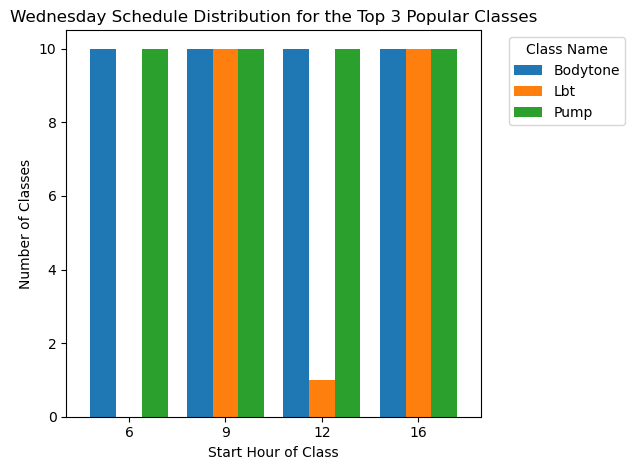

class_name  Bodytone   Lbt  Pump
start_hour                      
6               10.0   0.0  10.0
9               10.0  10.0  10.0
12              10.0   1.0  10.0
16              10.0  10.0  10.0


In [63]:
# Filter for Wednesday classes and the specific class names in timetable_data
wednesday_classes = timetable_data[
    (timetable_data['day_of_week'] == 'Wednesday') &
    (timetable_data['class_name'].isin(['Pump', 'Lbt', 'Bodytone']))
]

# Ensure 'slot_start_time' is a datetime type to extract the hour
wednesday_classes['slot_start_time'] = pd.to_datetime(wednesday_classes['slot_start_time'])
wednesday_classes['start_hour'] = wednesday_classes['slot_start_time'].dt.hour

# Group by class name and start hour and count the occurrences
wednesday_class_distribution = wednesday_classes.groupby(['class_name', 'start_hour']).size().reset_index(name='class_count')

# Pivot the table to get class names as columns and start hours as rows
pivot_table = wednesday_class_distribution.pivot(index='start_hour', columns='class_name', values='class_count').fillna(0)

# Plotting the distribution of classes by start hour for each class
plt.figure(figsize=(14, 7))
pivot_table.plot(kind='bar', stacked=False, width=0.8)
plt.title('Wednesday Schedule Distribution for the Top 3 Popular Classes')
plt.xlabel('Start Hour of Class')
plt.ylabel('Number of Classes')
plt.xticks(rotation=0)

# Position legend outside of the plot
plt.legend(title='Class Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

print(pivot_table)

C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\3287264045.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wednesday_classes['slot_start_time'] = pd.to_datetime(wednesday_classes['slot_start_time'])
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\3287264045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wednesday_classes['slot_start_time'] = pd.to_datetime(wednesday_classes['slot_start_time'])
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\3287264045.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

<Figure size 1400x700 with 0 Axes>

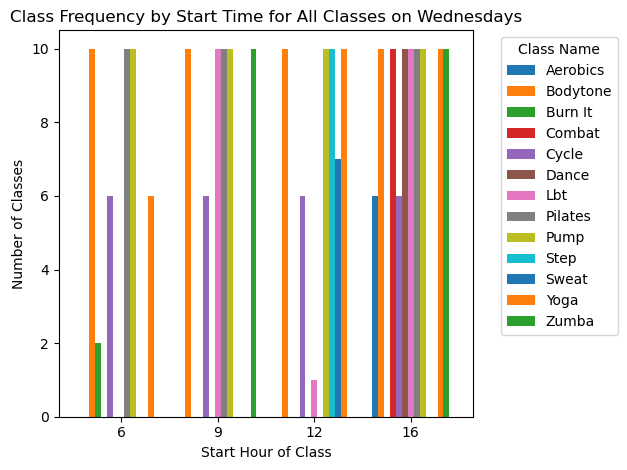

In [64]:
# Filter for Wednesday classes in timetable_data
wednesday_classes = timetable_data[timetable_data['day_of_week'] == 'Wednesday']

# Ensure 'slot_start_time' is a datetime type to extract the hour
wednesday_classes['slot_start_time'] = pd.to_datetime(wednesday_classes['slot_start_time'])
wednesday_classes['start_hour'] = wednesday_classes['slot_start_time'].dt.hour

# Group by class name and start hour and count the occurrences
wednesday_class_distribution = wednesday_classes.groupby(['class_name', 'start_hour']).size().reset_index(name='class_count')

# Pivot the table to get class names as columns and start hours as rows
pivot_table = wednesday_class_distribution.pivot(index='start_hour', columns='class_name', values='class_count').fillna(0)

# Plotting the distribution of classes by start hour for each class
plt.figure(figsize=(14, 7))
pivot_table.plot(kind='bar', stacked=False, width=0.8)
plt.title('Class Frequency by Start Time for All Classes on Wednesdays')
plt.xlabel('Start Hour of Class')
plt.ylabel('Number of Classes')
plt.xticks(rotation=0)

# Position legend outside of the plot
plt.legend(title='Class Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\2099028882.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wednesday_classes['slot_start_time'] = pd.to_datetime(wednesday_classes['slot_start_time'])
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\2099028882.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wednesday_classes['slot_start_time'] = pd.to_datetime(wednesday_classes['slot_start_time'])
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\2099028882.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

<Figure size 1400x700 with 0 Axes>

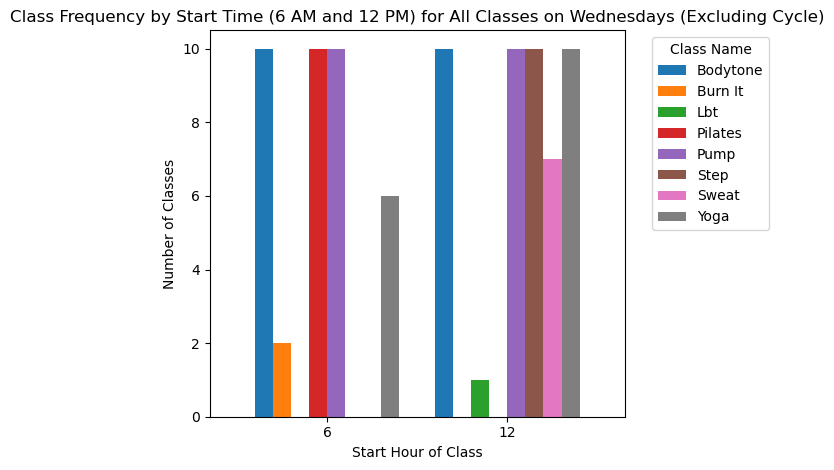

class_name  Bodytone  Burn It  Lbt  Pilates  Pump  Step  Sweat  Yoga
start_hour                                                          
6               10.0      2.0  0.0     10.0  10.0   0.0    0.0   6.0
12              10.0      0.0  1.0      0.0  10.0  10.0    7.0  10.0


In [65]:
# Filter for Wednesday classes in timetable_data
wednesday_classes = timetable_data[timetable_data['day_of_week'] == 'Wednesday']

# Ensure 'slot_start_time' is a datetime type to extract the hour
wednesday_classes['slot_start_time'] = pd.to_datetime(wednesday_classes['slot_start_time'])
wednesday_classes['start_hour'] = wednesday_classes['slot_start_time'].dt.hour

# Filter for classes that start at 6 AM and 12 PM
wednesday_classes_filtered = wednesday_classes[wednesday_classes['start_hour'].isin([6, 12])]

# Group by class name and start hour and count the occurrences
wednesday_class_distribution = wednesday_classes_filtered.groupby(['class_name', 'start_hour']).size().reset_index(name='class_count')

# Pivot the table to get class names as columns and start hours as rows
pivot_table = wednesday_class_distribution.pivot(index='start_hour', columns='class_name', values='class_count').fillna(0)

# Remove the 'Cycle' column
pivot_table = pivot_table.drop(columns=['Cycle'], errors='ignore')

# Plotting the distribution of classes by start hour for each class
plt.figure(figsize=(14, 7))
pivot_table.plot(kind='bar', stacked=False, width=0.8)
plt.title('Class Frequency by Start Time (6 AM and 12 PM) for All Classes on Wednesdays (Excluding Cycle)')
plt.xlabel('Start Hour of Class')
plt.ylabel('Number of Classes')
plt.xticks(rotation=0)

# Position legend outside of the plot
plt.legend(title='Class Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

print(pivot_table)

C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\447357340.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wednesday_classes['slot_start_time'] = pd.to_datetime(wednesday_classes['slot_start_time'])
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\447357340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wednesday_classes['slot_start_time'] = pd.to_datetime(wednesday_classes['slot_start_time'])
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\447357340.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

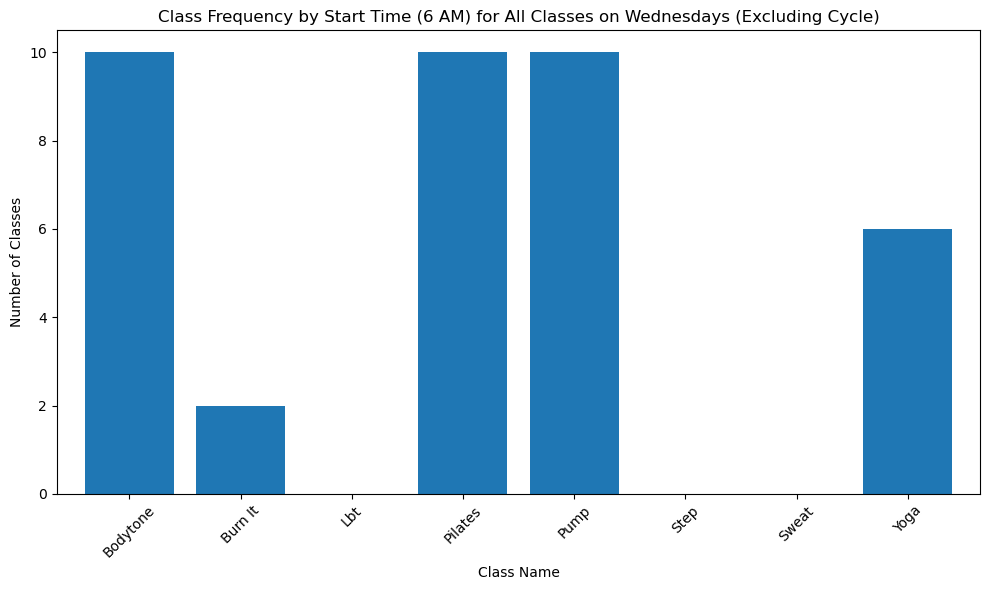

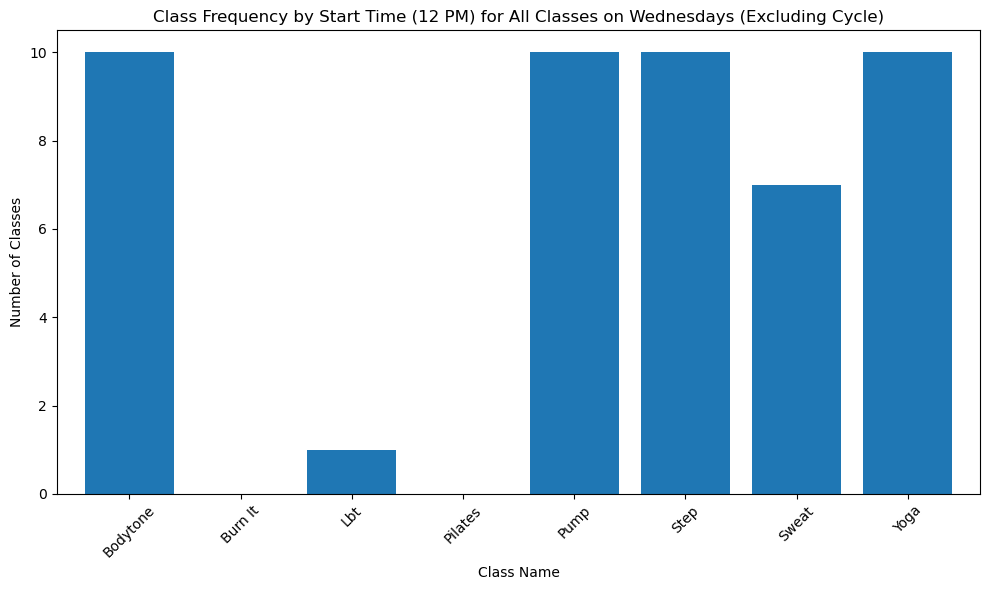

class_name  Bodytone  Burn It  Lbt  Pilates  Pump  Step  Sweat  Yoga
start_hour                                                          
6               10.0      2.0  0.0     10.0  10.0   0.0    0.0   6.0
12              10.0      0.0  1.0      0.0  10.0  10.0    7.0  10.0


In [66]:
# Filter for Wednesday classes in timetable_data
wednesday_classes = timetable_data[timetable_data['day_of_week'] == 'Wednesday']

# Ensure 'slot_start_time' is a datetime type to extract the hour
wednesday_classes['slot_start_time'] = pd.to_datetime(wednesday_classes['slot_start_time'])
wednesday_classes['start_hour'] = wednesday_classes['slot_start_time'].dt.hour

# Filter for classes that start at 6 AM and 12 PM
wednesday_classes_filtered = wednesday_classes[wednesday_classes['start_hour'].isin([6, 12])]

# Group by class name and start hour and count the occurrences
wednesday_class_distribution = wednesday_classes_filtered.groupby(['class_name', 'start_hour']).size().reset_index(name='class_count')

# Pivot the table to get class names as columns and start hours as rows
pivot_table = wednesday_class_distribution.pivot(index='start_hour', columns='class_name', values='class_count').fillna(0)

# Remove the 'Cycle' column
pivot_table = pivot_table.drop(columns=['Cycle'], errors='ignore')

# Plotting the distribution of classes starting at 6 AM
if 6 in pivot_table.index:
    plt.figure(figsize=(10, 6))
    pivot_table.loc[6].plot(kind='bar', stacked=False, width=0.8)
    plt.title('Class Frequency by Start Time (6 AM) for All Classes on Wednesdays (Excluding Cycle)')
    plt.xlabel('Class Name')
    plt.ylabel('Number of Classes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting the distribution of classes starting at 12 PM
if 12 in pivot_table.index:
    plt.figure(figsize=(10, 6))
    pivot_table.loc[12].plot(kind='bar', stacked=False, width=0.8)
    plt.title('Class Frequency by Start Time (12 PM) for All Classes on Wednesdays (Excluding Cycle)')
    plt.xlabel('Class Name')
    plt.ylabel('Number of Classes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

print(pivot_table)


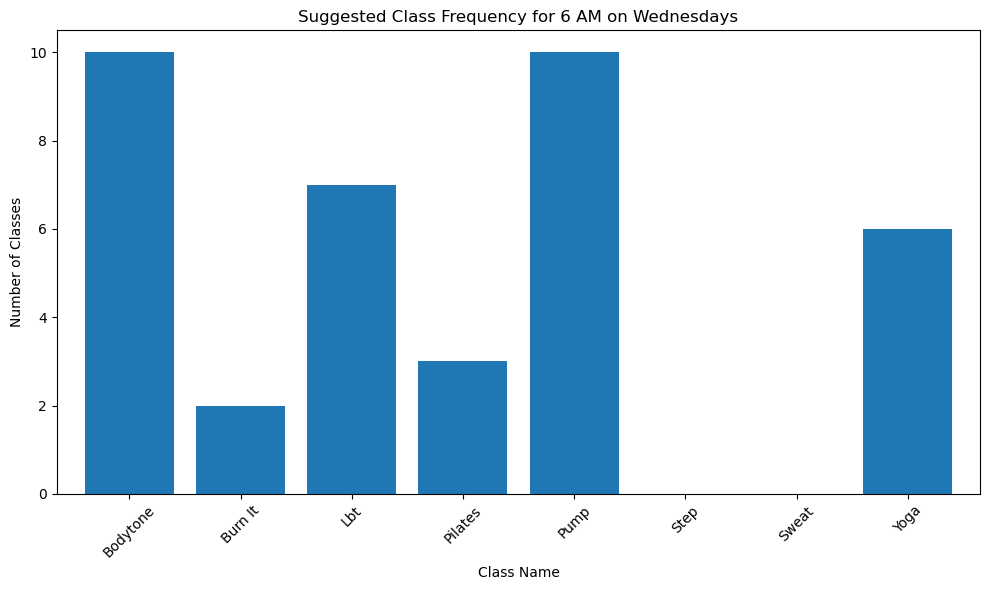

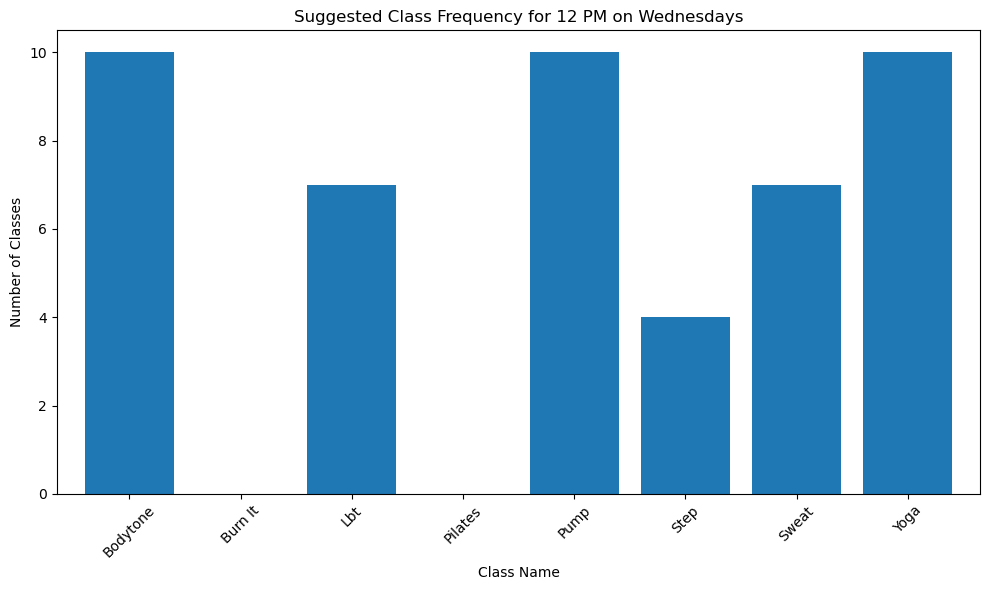

class_name  Bodytone  Burn It  Lbt  Pilates  Pump  Step  Sweat  Yoga
6               10.0      2.0  7.0      3.0  10.0   0.0    0.0   6.0
12              10.0      0.0  7.0      0.0  10.0   4.0    7.0  10.0


In [67]:
# Assuming the pivot_table data is as provided:
data = {
    'class_name': ['Bodytone', 'Burn It', 'Lbt', 'Pilates', 'Pump', 'Step', 'Sweat', 'Yoga'],
    '6': [10.0, 2.0, 0.0, 10.0, 10.0, 0.0, 0.0, 6.0],
    '12': [10.0, 0.0, 1.0, 0.0, 10.0, 10.0, 7.0, 10.0]
}
pivot_table = pd.DataFrame(data).set_index('class_name').T

# Adjust the data based on the user's request
pivot_table.at['6', 'Pilates'] = 3
pivot_table.at['6', 'Lbt'] = 7
pivot_table.at['12', 'Step'] = 4
pivot_table.at['12', 'Lbt'] = 7

# Plotting the distribution of classes starting at 6 AM
if '6' in pivot_table.index:
    plt.figure(figsize=(10, 6))
    pivot_table.loc['6'].plot(kind='bar', stacked=False, width=0.8)
    plt.title('Suggested Class Frequency for 6 AM on Wednesdays')
    plt.xlabel('Class Name')
    plt.ylabel('Number of Classes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting the distribution of classes starting at 12 PM
if '12' in pivot_table.index:
    plt.figure(figsize=(10, 6))
    pivot_table.loc['12'].plot(kind='bar', stacked=False, width=0.8)
    plt.title('Suggested Class Frequency for 12 PM on Wednesdays')
    plt.xlabel('Class Name')
    plt.ylabel('Number of Classes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Display the adjusted data
print(pivot_table)

C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\682129892.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  saturday_classes['slot_start_time'] = pd.to_datetime(saturday_classes['slot_start_time'])
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\682129892.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saturday_classes['slot_start_time'] = pd.to_datetime(saturday_classes['slot_start_time'])
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\682129892.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



<Figure size 1400x700 with 0 Axes>

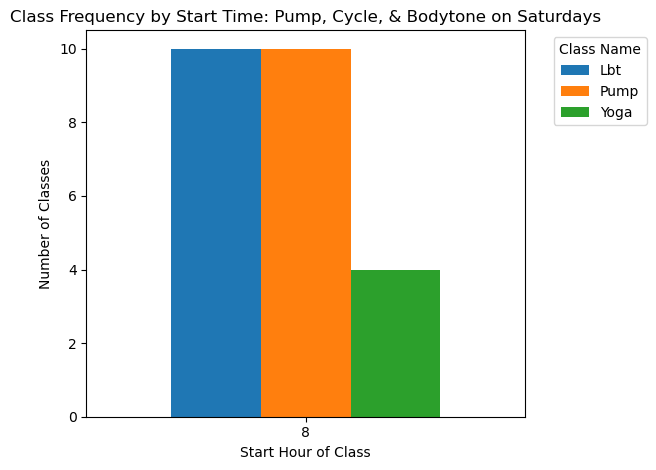

In [68]:
# Filter for Saturday classes and the specific class names in timetable_data
saturday_classes = timetable_data[
    (timetable_data['day_of_week'] == 'Saturday') &
    (timetable_data['class_name'].isin(['Pump', 'Yoga', 'Lbt']))
]

# Ensure 'slot_start_time' is a datetime type to extract the hour
saturday_classes['slot_start_time'] = pd.to_datetime(saturday_classes['slot_start_time'])
saturday_classes['start_hour'] = saturday_classes['slot_start_time'].dt.hour

# Group by class name and start hour and count the occurrences
saturday_class_distribution = saturday_classes.groupby(['class_name', 'start_hour']).size().reset_index(name='class_count')

# Pivot the table to get class names as columns and start hours as rows
saturday_pivot_table = saturday_class_distribution.pivot(index='start_hour', columns='class_name', values='class_count').fillna(0)

# Plotting the distribution of classes by start hour for each class
plt.figure(figsize=(14, 7))
saturday_pivot_table.plot(kind='bar', stacked=False, width=0.8)
plt.title('Class Frequency by Start Time: Pump, Cycle, & Bodytone on Saturdays')
plt.xlabel('Start Hour of Class')
plt.ylabel('Number of Classes')
plt.xticks(rotation=0)

# Position legend outside of the plot
plt.legend(title='Class Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\1266048016.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sunday_classes['slot_start_time'] = pd.to_datetime(sunday_classes['slot_start_time'])
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\1266048016.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunday_classes['slot_start_time'] = pd.to_datetime(sunday_classes['slot_start_time'])
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\1266048016.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

<Figure size 1400x700 with 0 Axes>

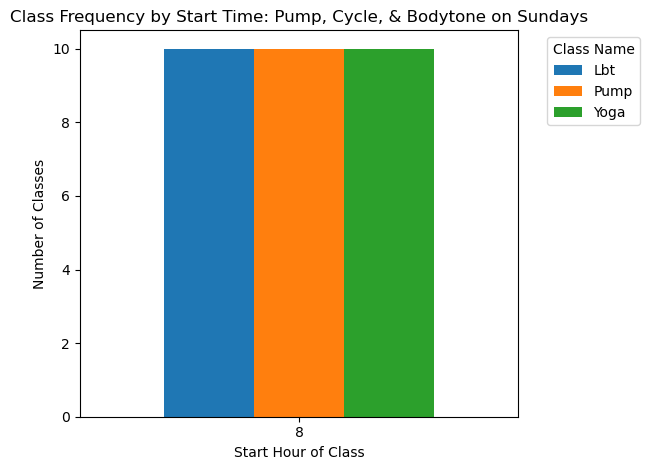

In [69]:
# Filter for Sunday classes and the specific class names in timetable_data
sunday_classes = timetable_data[
    (timetable_data['day_of_week'] == 'Sunday') &
    (timetable_data['class_name'].isin(['Pump', 'Yoga', 'Lbt']))
]

# Ensure 'slot_start_time' is a datetime type to extract the hour
sunday_classes['slot_start_time'] = pd.to_datetime(sunday_classes['slot_start_time'])
sunday_classes['start_hour'] = sunday_classes['slot_start_time'].dt.hour

# Group by class name and start hour and count the occurrences
sunday_class_distribution = sunday_classes.groupby(['class_name', 'start_hour']).size().reset_index(name='class_count')

# Pivot the table to get class names as columns and start hours as rows
sunday_pivot_table = sunday_class_distribution.pivot(index='start_hour', columns='class_name', values='class_count').fillna(0)

# Plotting the distribution of classes by start hour for each class
plt.figure(figsize=(14, 7))
sunday_pivot_table.plot(kind='bar', stacked=False, width=0.8)
plt.title('Class Frequency by Start Time: Pump, Cycle, & Bodytone on Sundays')
plt.xlabel('Start Hour of Class')
plt.ylabel('Number of Classes')
plt.xticks(rotation=0)

# Position legend outside of the plot
plt.legend(title='Class Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\106315992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunday_classes['total_attended'] = sunday_classes['male'] + sunday_classes['female']


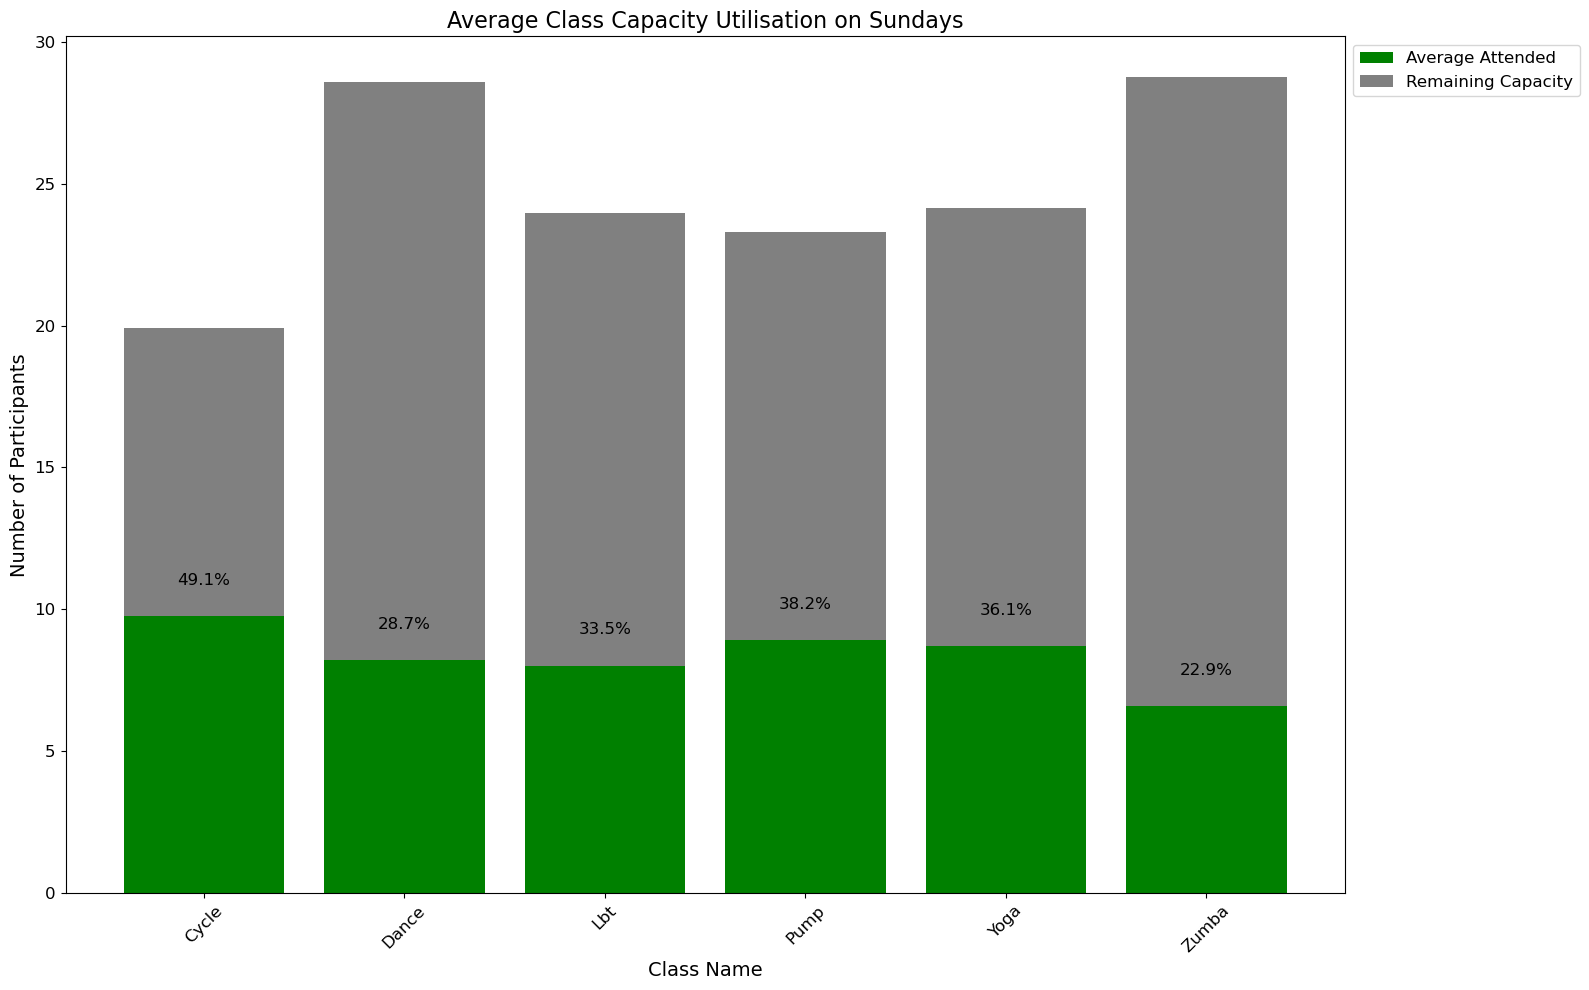

In [70]:
# Filter for Sunday classes with 'ATTENDED' status
sunday_classes = merged_data[
    (merged_data['day_of_week'] == 'Sunday') &
    (merged_data['participation_status'] == 'ATTENDED')
]

# Calculate total attendees (sum of male and female)
sunday_classes['total_attended'] = sunday_classes['male'] + sunday_classes['female']

# Aggregate data by class name and calculate averages
class_capacity_averages_sunday = sunday_classes.groupby('class_name').agg(
    average_attended=pd.NamedAgg(column='total_attended', aggfunc='mean'),
    average_capacity=pd.NamedAgg(column='class_capacity', aggfunc='mean')
).reset_index()

# Calculate the utilization percentage
class_capacity_averages_sunday['utilization_rate'] = (class_capacity_averages_sunday['average_attended'] / class_capacity_averages_sunday['average_capacity']) * 100

# Calculate the remaining capacity
class_capacity_averages_sunday['remaining_capacity'] = class_capacity_averages_sunday['average_capacity'] - class_capacity_averages_sunday['average_attended']

# Plotting
fig, ax = plt.subplots(figsize=(16, 10))

# Stacked Bar Chart
bars = ax.bar(class_capacity_averages_sunday['class_name'],
              class_capacity_averages_sunday['average_attended'], 
              color='green', label='Average Attended')

remaining_capacity = ax.bar(class_capacity_averages_sunday['class_name'],
                            class_capacity_averages_sunday['remaining_capacity'], 
                            bottom=class_capacity_averages_sunday['average_attended'], 
                            color='grey', label='Remaining Capacity')

# Add labels and title
ax.set_xlabel('Class Name', fontsize=14)
ax.set_ylabel('Number of Participants', fontsize=14)
ax.set_title('Average Class Capacity Utilisation on Sundays', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Annotate bars with utilization rate
for i in range(len(class_capacity_averages_sunday)):
    ax.text(i, class_capacity_averages_sunday['average_attended'][i] + 1, 
            f'{class_capacity_averages_sunday["utilization_rate"][i]:.1f}%', 
            ha='center', va='bottom', color='black', fontsize=12)

# Show legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\1557767544.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saturday_classes['total_attended'] = saturday_classes['male'] + saturday_classes['female']


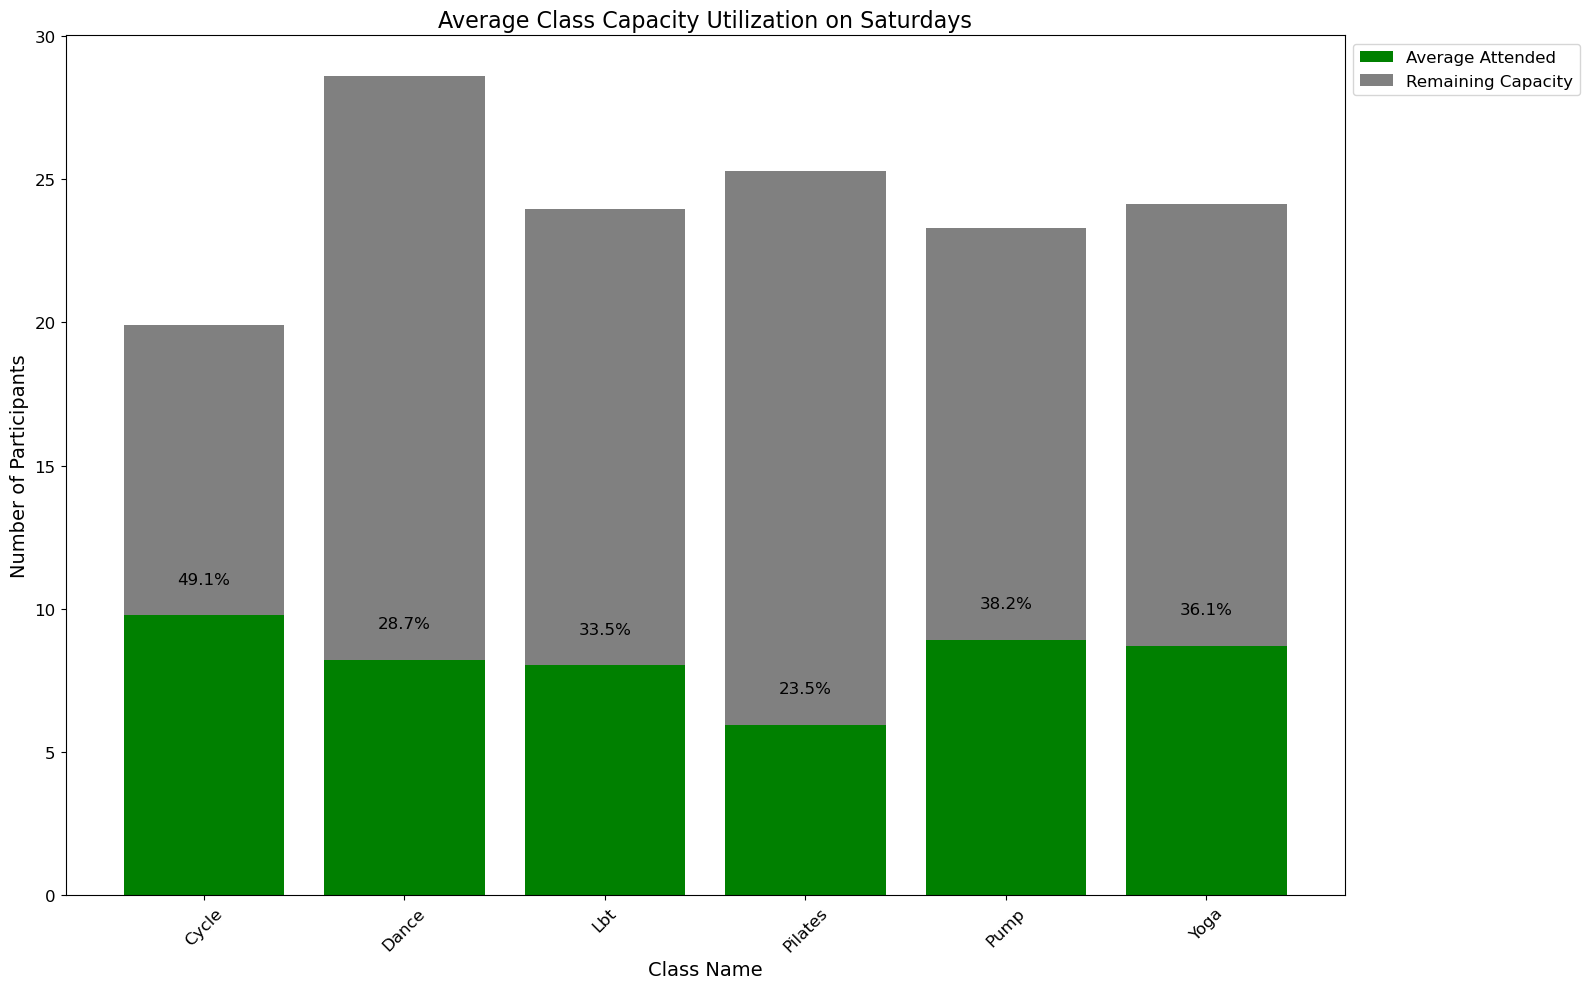

Class Utilization Rates on Saturday:
  class_name  utilization_rate
0      Cycle         49.051292
1      Dance         28.706740
2        Lbt         33.473681
3    Pilates         23.507037
4       Pump         38.243673
5       Yoga         36.098951


In [71]:
# Filter for Saturday classes with 'ATTENDED' status
saturday_classes = merged_data[
    (merged_data['day_of_week'] == 'Saturday') &
    (merged_data['participation_status'] == 'ATTENDED')
]

# Calculate total attendees (sum of male and female)
saturday_classes['total_attended'] = saturday_classes['male'] + saturday_classes['female']

# Aggregate data by class name and calculate averages
class_capacity_averages_saturday = saturday_classes.groupby('class_name').agg(
    average_attended=pd.NamedAgg(column='total_attended', aggfunc='mean'),
    average_capacity=pd.NamedAgg(column='class_capacity', aggfunc='mean')
).reset_index()

# Calculate the utilization percentage
class_capacity_averages_saturday['utilization_rate'] = (class_capacity_averages_saturday['average_attended'] / class_capacity_averages_saturday['average_capacity']) * 100

# Calculate the remaining capacity
class_capacity_averages_saturday['remaining_capacity'] = class_capacity_averages_saturday['average_capacity'] - class_capacity_averages_saturday['average_attended']

# Plotting
fig, ax = plt.subplots(figsize=(16, 10))

# Stacked Bar Chart
bars = ax.bar(class_capacity_averages_saturday['class_name'],
              class_capacity_averages_saturday['average_attended'], 
              color='green', label='Average Attended')

remaining_capacity = ax.bar(class_capacity_averages_saturday['class_name'],
                            class_capacity_averages_saturday['remaining_capacity'], 
                            bottom=class_capacity_averages_saturday['average_attended'], 
                            color='grey', label='Remaining Capacity')

# Add labels and title
ax.set_xlabel('Class Name', fontsize=14)
ax.set_ylabel('Number of Participants', fontsize=14)
ax.set_title('Average Class Capacity Utilization on Saturdays', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Annotate bars with utilization rate
for i in range(len(class_capacity_averages_saturday)):
    ax.text(i, class_capacity_averages_saturday['average_attended'][i] + 1, 
            f'{class_capacity_averages_saturday["utilization_rate"][i]:.1f}%', 
            ha='center', va='bottom', color='black', fontsize=12)

# Show legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adjust layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()

# Print the utilization rates
print("Class Utilization Rates on Saturday:")
print(class_capacity_averages_saturday[['class_name', 'utilization_rate']])

C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\3450430253.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saturday_data['check_in_hour'] = saturday_data['check_in_datetime'].dt.hour + saturday_data['check_in_datetime'].dt.minute / 60.0
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\3450430253.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunday_data['check_in_hour'] = sunday_data['check_in_datetime'].dt.hour + sunday_data['check_in_datetime'].dt.minute / 60.0
C:\Users\todyl\AppData\Local\Tem

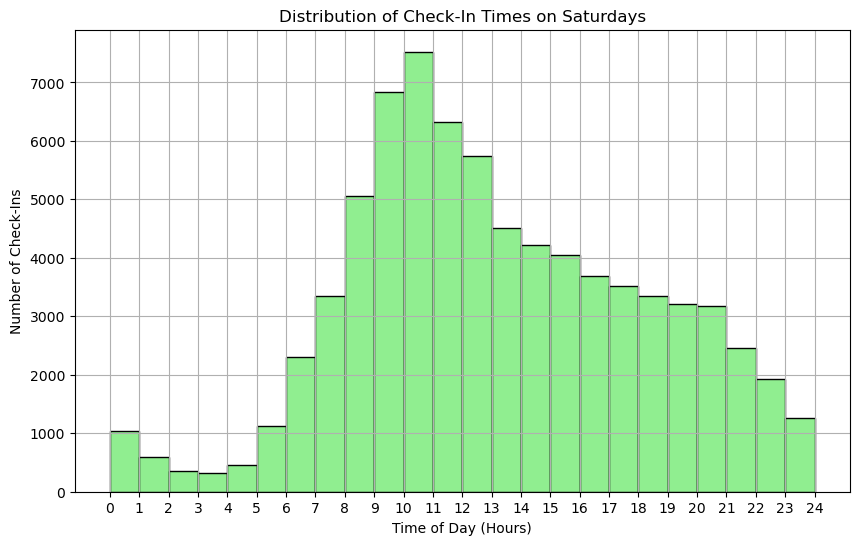

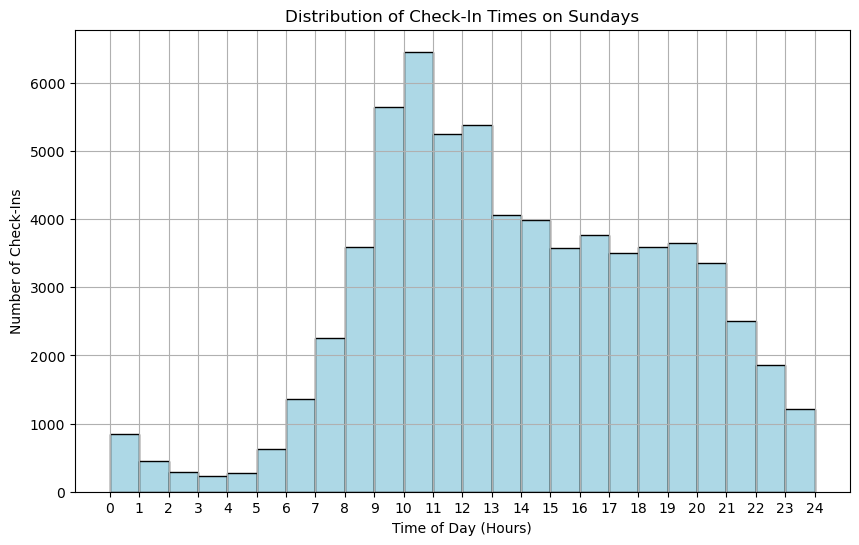

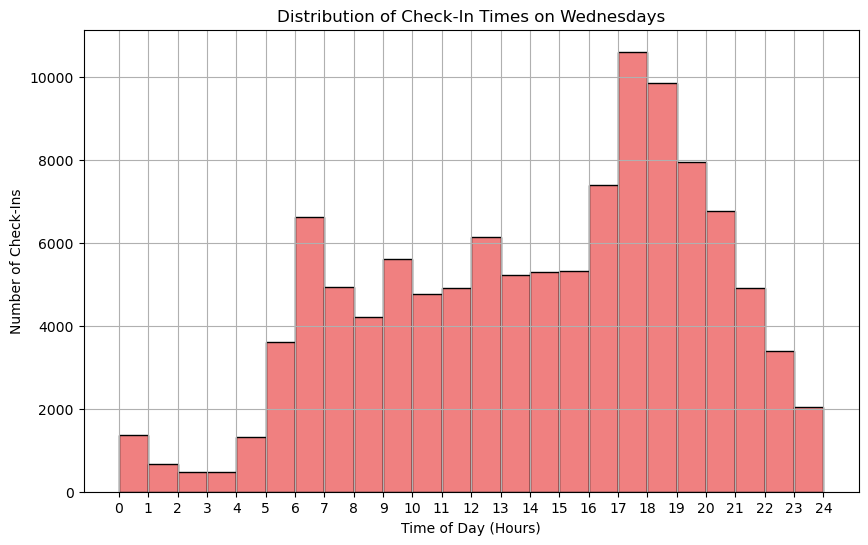

In [72]:
# Convert 'check_in_datetime' to datetime format
cleaned_visit_data['check_in_datetime'] = pd.to_datetime(cleaned_visit_data['check_in_datetime'], errors='coerce')

# Filter for Saturdays
saturday_data = cleaned_visit_data[cleaned_visit_data['check_in_datetime'].dt.dayofweek == 5]

# Filter for Sundays
sunday_data = cleaned_visit_data[cleaned_visit_data['check_in_datetime'].dt.dayofweek == 6]

# Filter for Wednesdays
wednesday_data = cleaned_visit_data[cleaned_visit_data['check_in_datetime'].dt.dayofweek == 2]

# Extract the hour of check-in for each day
saturday_data['check_in_hour'] = saturday_data['check_in_datetime'].dt.hour + saturday_data['check_in_datetime'].dt.minute / 60.0
sunday_data['check_in_hour'] = sunday_data['check_in_datetime'].dt.hour + sunday_data['check_in_datetime'].dt.minute / 60.0
wednesday_data['check_in_hour'] = wednesday_data['check_in_datetime'].dt.hour + wednesday_data['check_in_datetime'].dt.minute / 60.0

# Plot the distribution of check-in times on Saturdays
plt.figure(figsize=(10, 6))
plt.hist(saturday_data['check_in_hour'], bins=24, range=(0, 24), color='lightgreen', edgecolor='black')
plt.title('Distribution of Check-In Times on Saturdays')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Check-Ins')
plt.xticks(range(0, 25))  # Set x-ticks to represent hours
plt.grid(True)
plt.show()

# Plot the distribution of check-in times on Sundays
plt.figure(figsize=(10, 6))
plt.hist(sunday_data['check_in_hour'], bins=24, range=(0, 24), color='lightblue', edgecolor='black')
plt.title('Distribution of Check-In Times on Sundays')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Check-Ins')
plt.xticks(range(0, 25))  # Set x-ticks to represent hours
plt.grid(True)
plt.show()

# Plot the distribution of check-in times on Wednesdays
plt.figure(figsize=(10, 6))
plt.hist(wednesday_data['check_in_hour'], bins=24, range=(0, 24), color='lightcoral', edgecolor='black')
plt.title('Distribution of Check-In Times on Wednesdays')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Check-Ins')
plt.xticks(range(0, 25))  # Set x-ticks to represent hours
plt.grid(True)
plt.show()


Top 7 Classes by No-Shows:
class_name
Cycle       2336
Lbt         1559
Pump        1296
Bodytone    1158
Circuits     743
Burn It      602
Sweat        385
Name: NO SHOW, dtype: int64

Top 7 Classes by Waiting List:
class_name
Cycle       900
Bodytone    312
Lbt         287
Pump        274
Sweat       216
Strength    113
Burn It     109
Name: WAITING LIST, dtype: int64

Top 7 Classes by Cancellations:
class_name
Cycle          3461
Lbt            2820
Pump           2314
Bodytone       2303
Circuits       1509
Burn It        1368
Get Started     952
Name: CANCELLED, dtype: int64


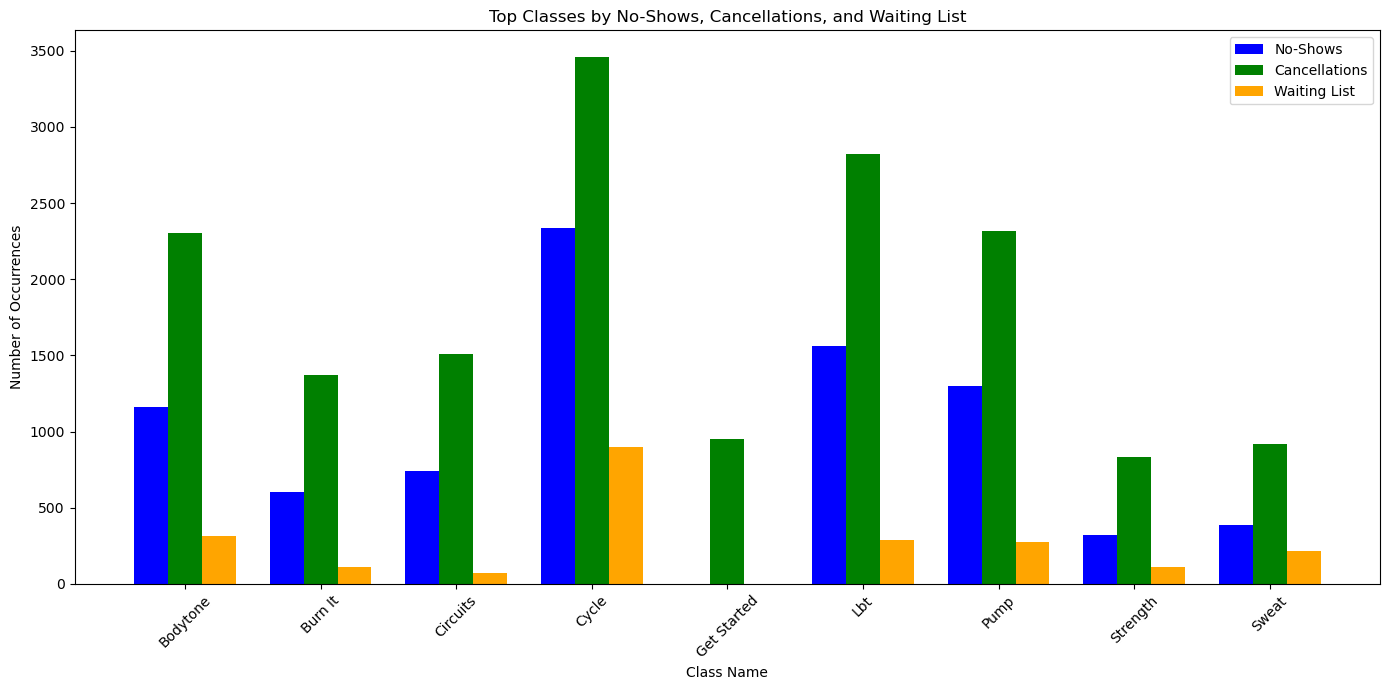

In [73]:
# Top 7 classes by no-shows
top_7_no_shows = class_participation_summary['NO SHOW'].nlargest(7)
print("\nTop 7 Classes by No-Shows:")
print(top_7_no_shows)

# Top 7 classes by waiting list
top_7_waiting_list = class_participation_summary['WAITING LIST'].nlargest(7)
print("\nTop 7 Classes by Waiting List:")
print(top_7_waiting_list)

# Top 7 classes by cancellations
top_7_cancellations = class_participation_summary['CANCELLED'].nlargest(7)
print("\nTop 7 Classes by Cancellations:")
print(top_7_cancellations)

# Get the union of the top 7 classes by cancellations, no-shows, and waiting list
top_classes = top_7_no_shows.index.union(top_7_waiting_list.index).union(top_7_cancellations.index)

# Get the values for cancellations, no-shows, and waiting list for these classes
cancellations = class_participation_summary.loc[top_classes, 'CANCELLED']
no_shows = class_participation_summary.loc[top_classes, 'NO SHOW']
waiting_list = class_participation_summary.loc[top_classes, 'WAITING LIST']

# Plotting
x = np.arange(len(top_classes))  # the label locations
width = 0.25  # the width of the bars

plt.figure(figsize=(14, 7))
plt.bar(x - width, no_shows, width, label='No-Shows', color='blue')
plt.bar(x, cancellations, width, label='Cancellations', color='green')
plt.bar(x + width, waiting_list, width, label='Waiting List', color='orange')

plt.title('Top Classes by No-Shows, Cancellations, and Waiting List')
plt.xlabel('Class Name')
plt.ylabel('Number of Occurrences')
plt.xticks(x, top_classes, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


Top 7 Classes by No-Shows:
class_name
Cycle       2336
Lbt         1559
Pump        1296
Bodytone    1158
Circuits     743
Burn It      602
Sweat        385
Name: NO SHOW, dtype: int64

Top 7 Classes by Waiting List:
class_name
Cycle       900
Bodytone    312
Lbt         287
Pump        274
Sweat       216
Strength    113
Burn It     109
Name: WAITING LIST, dtype: int64

Top 7 Classes by Cancellations:
class_name
Cycle          3461
Lbt            2820
Pump           2314
Bodytone       2303
Circuits       1509
Burn It        1368
Get Started     952
Name: CANCELLED, dtype: int64


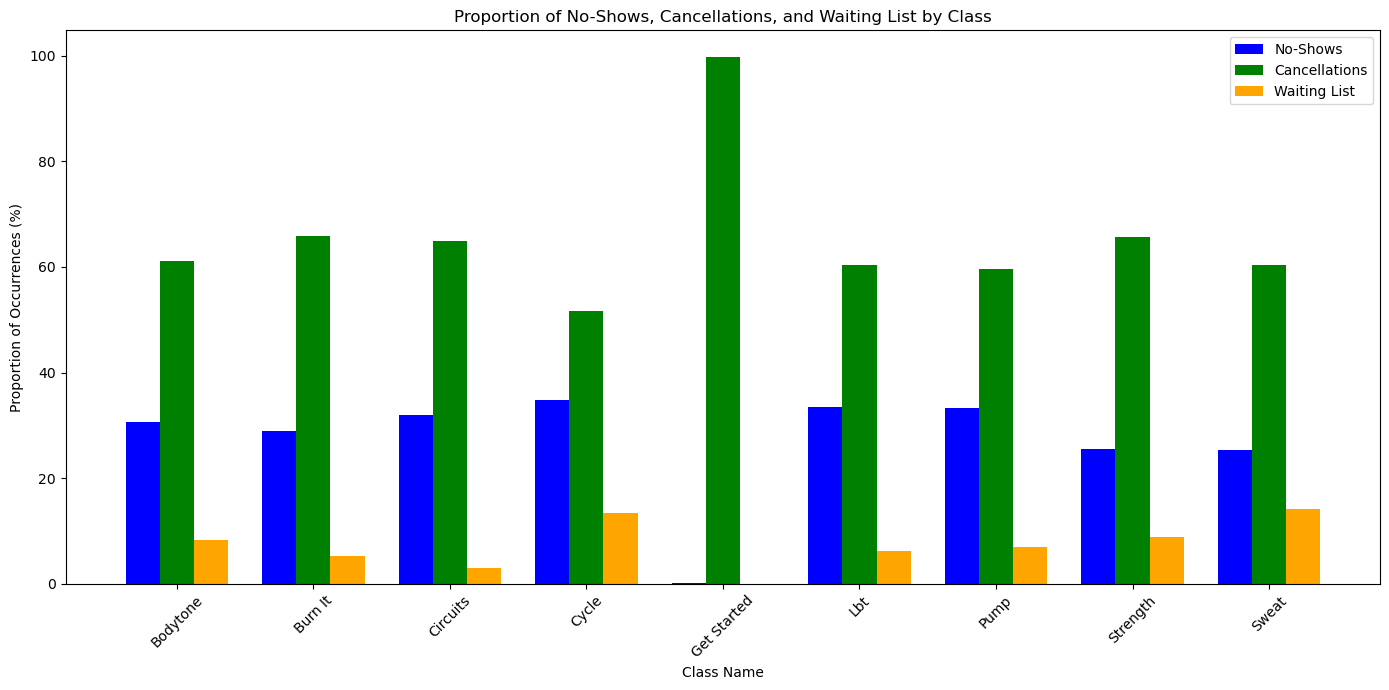

In [74]:
# Top 7 classes by no-shows
top_7_no_shows = class_participation_summary['NO SHOW'].nlargest(7)
print("\nTop 7 Classes by No-Shows:")
print(top_7_no_shows)

# Top 7 classes by waiting list
top_7_waiting_list = class_participation_summary['WAITING LIST'].nlargest(7)
print("\nTop 7 Classes by Waiting List:")
print(top_7_waiting_list)

# Top 7 classes by cancellations
top_7_cancellations = class_participation_summary['CANCELLED'].nlargest(7)
print("\nTop 7 Classes by Cancellations:")
print(top_7_cancellations)

# Get the union of the top 7 classes by cancellations, no-shows, and waiting list
top_classes = top_7_no_shows.index.union(top_7_waiting_list.index).union(top_7_cancellations.index)

# Get the values for cancellations, no-shows, and waiting list for these classes
cancellations = class_participation_summary.loc[top_classes, 'CANCELLED']
no_shows = class_participation_summary.loc[top_classes, 'NO SHOW']
waiting_list = class_participation_summary.loc[top_classes, 'WAITING LIST']

# Calculate total occurrences for normalization
total_occurrences = cancellations + no_shows + waiting_list

# Calculate proportions
cancellations_proportion = (cancellations / total_occurrences) * 100
no_shows_proportion = (no_shows / total_occurrences) * 100
waiting_list_proportion = (waiting_list / total_occurrences) * 100

# Plotting
x = np.arange(len(top_classes))  # the label locations
width = 0.25  # the width of the bars

plt.figure(figsize=(14, 7))D
plt.bar(x - width, no_shows_proportion, width, label='No-Shows', color='blue')
plt.bar(x, cancellations_proportion, width, label='Cancellations', color='green')
plt.bar(x + width, waiting_list_proportion, width, label='Waiting List', color='orange')

plt.title('Proportion of No-Shows, Cancellations, and Waiting List by Class')
plt.xlabel('Class Name')
plt.ylabel('Proportion of Occurrences (%)')
plt.xticks(x, top_classes, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\397240676.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attended_data['total_participants'] = attended_data['female'] + attended_data['male']
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\397240676.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(class_data_sorted['class_name'], rotation=45)


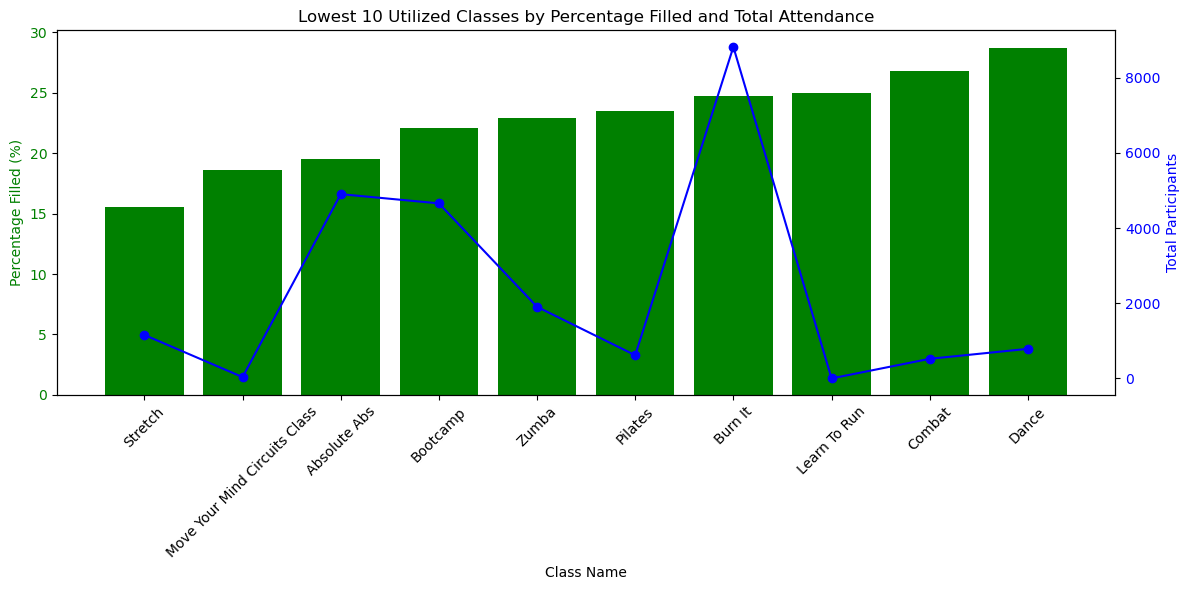

Lowest 10 Utilized Classes:
                       class_name  total_participants  class_capacity  \
29                        Stretch                1157            7431   
24  Move Your Mind Circuits Class                  37             199   
0                    Absolute Abs                4900           25111   
3                        Bootcamp                4655           21130   
33                          Zumba                1905            8308   
25                        Pilates                 618            2629   
5                         Burn It                8814           35668   
20                   Learn To Run                   2               8   
8                          Combat                 523            1955   
11                          Dance                 788            2745   

    percentage_filled  
29          15.569910  
24          18.592965  
0           19.513361  
3           22.030289  
33          22.929706  
25          23.507037  


In [75]:
# Filter data for 'ATTENDED' status
attended_data = cleaned_class_data[cleaned_class_data['participation_status'] == 'ATTENDED']

# Calculate total participants for each class
attended_data['total_participants'] = attended_data['female'] + attended_data['male']

# Aggregate total attendance and class capacity for each class
aggregated_data = attended_data.groupby('class_name').agg({
    'total_participants': 'sum',
    'class_capacity': 'sum'  # Summing capacity in case of multiple entries
}).reset_index()

# Calculate percentage of class capacity filled
aggregated_data['percentage_filled'] = (aggregated_data['total_participants'] / aggregated_data['class_capacity']) * 100

# Sort by percentage filled in ascending order to find lowest utilization
class_data_sorted = aggregated_data.sort_values(by='percentage_filled').head(10)

# Plotting based on the order of percentage filled
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the percentage filled on the left y-axis
ax1.bar(class_data_sorted['class_name'], class_data_sorted['percentage_filled'], color='green', label='Percentage Filled')
ax1.set_xlabel('Class Name')
ax1.set_ylabel('Percentage Filled (%)', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xticklabels(class_data_sorted['class_name'], rotation=45)

# Create a second y-axis for total participants
ax2 = ax1.twinx()
ax2.plot(class_data_sorted['class_name'], class_data_sorted['total_participants'], color='blue', marker='o', linestyle='-', label='Total Participants')
ax2.set_ylabel('Total Participants', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and layout
plt.title('Lowest 10 Utilised Classes by Percentage Filled and Total Attendance')
fig.tight_layout()

plt.show()

# Display the sorted data for reference
print("Lowest 10 Utilized Classes:")
print(class_data_sorted)

C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\398626248.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tuesday_classes['slot_start_time'] = pd.to_datetime(tuesday_classes['slot_start_time'])
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\398626248.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuesday_classes['slot_start_time'] = pd.to_datetime(tuesday_classes['slot_start_time'])
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\398626248.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

<Figure size 1400x700 with 0 Axes>

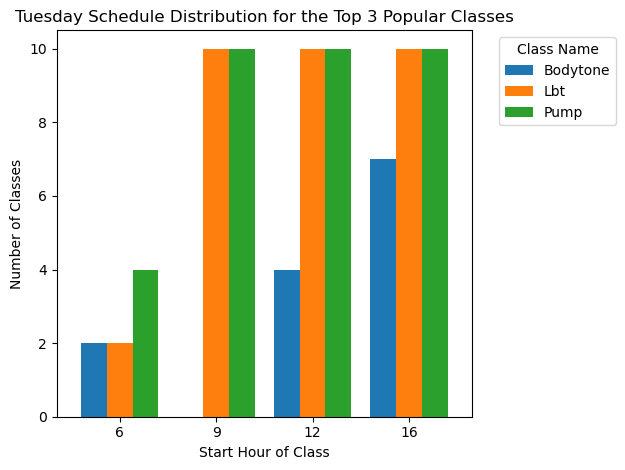

class_name  Bodytone   Lbt  Pump
start_hour                      
6                2.0   2.0   4.0
9                0.0  10.0  10.0
12               4.0  10.0  10.0
16               7.0  10.0  10.0


In [76]:
tuesday_classes = timetable_data[
    (timetable_data['day_of_week'] == 'Tuesday') &
    (timetable_data['class_name'].isin(['Pump', 'Lbt', 'Bodytone']))
]

# Ensure 'slot_start_time' is a datetime type to extract the hour
tuesday_classes['slot_start_time'] = pd.to_datetime(tuesday_classes['slot_start_time'])
tuesday_classes['start_hour'] = tuesday_classes['slot_start_time'].dt.hour

# Group by class name and start hour and count the occurrences
tuesday_class_distribution = tuesday_classes.groupby(['class_name', 'start_hour']).size().reset_index(name='class_count')

# Pivot the table to get class names as columns and start hours as rows
pivot_table = tuesday_class_distribution.pivot(index='start_hour', columns='class_name', values='class_count').fillna(0)

# Plotting the distribution of classes by start hour for each class
plt.figure(figsize=(14, 7))
pivot_table.plot(kind='bar', stacked=False, width=0.8)
plt.title('Tuesday Schedule Distribution for the Top 3 Popular Classes')
plt.xlabel('Start Hour of Class')
plt.ylabel('Number of Classes')
plt.xticks(rotation=0)

# Position legend outside of the plot
plt.legend(title='Class Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

print(pivot_table)

C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\1624323338.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  friday_classes['slot_start_time'] = pd.to_datetime(friday_classes['slot_start_time'])
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\1624323338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  friday_classes['slot_start_time'] = pd.to_datetime(friday_classes['slot_start_time'])
C:\Users\todyl\AppData\Local\Temp\ipykernel_4576\1624323338.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

<Figure size 1400x700 with 0 Axes>

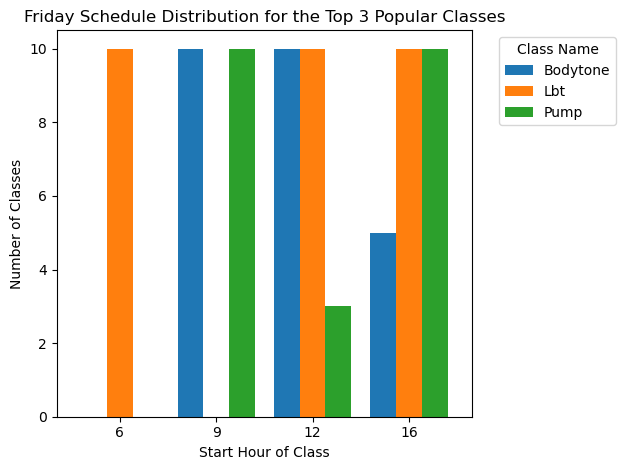

class_name  Bodytone   Lbt  Pump
start_hour                      
6                0.0  10.0   0.0
9               10.0   0.0  10.0
12              10.0  10.0   3.0
16               5.0  10.0  10.0


In [77]:
# Filter for Friday classes and the specific class names in timetable_data
friday_classes = timetable_data[
    (timetable_data['day_of_week'] == 'Friday') &
    (timetable_data['class_name'].isin(['Pump', 'Lbt', 'Bodytone']))
]

# Ensure 'slot_start_time' is a datetime type to extract the hour
friday_classes['slot_start_time'] = pd.to_datetime(friday_classes['slot_start_time'])
friday_classes['start_hour'] = friday_classes['slot_start_time'].dt.hour

# Group by class name and start hour and count the occurrences
friday_class_distribution = friday_classes.groupby(['class_name', 'start_hour']).size().reset_index(name='class_count')

# Pivot the table to get class names as columns and start hours as rows
pivot_table = friday_class_distribution.pivot(index='start_hour', columns='class_name', values='class_count').fillna(0)

# Plotting the distribution of classes by start hour for each class
plt.figure(figsize=(14, 7))
pivot_table.plot(kind='bar', stacked=False, width=0.8)
plt.title('Friday Schedule Distribution for the Top 3 Popular Classes')
plt.xlabel('Start Hour of Class')
plt.ylabel('Number of Classes')
plt.xticks(rotation=0)

# Position legend outside of the plot
plt.legend(title='Class Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

print(pivot_table)
